# Discriminating Seagrasses From Green Macroalgae in European Intertidal

areas using high resolution multispectral drone imagery.

Simon Oiry [](https://orcid.org/0000-0001-7161-5246) (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
Bede Ffinian Rowe Davies (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
Ana I. Sousa (CESAM – Centre for Environmental and Marine Studies, Department of Biology, University of Aveiro, Aveiro, Portugal)  
Philippe Rosa (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
Maria Laura Zoffoli (Consiglio Nazionale delle Ricerche, Istituto di Scienze Marine (CNR-ISMAR), 00133 Rome, Italy)  
Guillaume Brunier (BRGM French Geological Survey, Cayenne 97300, French Guiana)  
Pierre Gernez (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
Laurent Barillé (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
March 2, 2024

Coastal areas host seagrass meadows, which offer crucial ecosystem services including erosion control and carbon sequestration. However, these areas are increasingly impacted by human activities, leading to seagrass decline and habitat fragmentation. In situ surveys, traditionally performed to monitor these ecosystems face limitations on temporal and spatial coverage, particularly in intertidal zones, prompting the use of satellite data within monitoring programs. Yet, satellite remote sensing struggles with spatial and spectral resolution, making it difficult to discriminate seagrass from other macrophytes in highly heterogenous meadows. To address these challenges, drone images acquired with multi-spectral sensors offer a promising solution. This study focuses on using drones acquisitions for mapping intertidal macrophytes, effectively discriminating between seagrass and green macroalgae. Ten drone flights were conducted at two different altitudes (12m and 120m) across diverse European habitats in France and Portugal. Low altitude flights were used to train a Deep Learning classifier based on Neural Networks to discrimintate among 5 intertidal vegetation classes. Drone mapping demonstrated an overall accuracy of 94% across all the sites and images, covering a total area of 467 000 m². The model exhibited an accuracy of 96.4% in identifying seagrass.

In [ ]:
library(flextable)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::compose() masks flextable::compose()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attachement du package : 'tidyterra'

L'objet suivant est masqué depuis 'package:stats':

    filter

── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──
✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()    masks flextable::compose()
✖ scales::discard()   masks purrr::discard()
✖ tidyterra::filter() masks dplyr::filter(), stats::filter()
✖ recipes::fixed()    masks stringr::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ yardstick::spec()   masks readr::spec()
✖ recipes::step()     masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

Le chargement a nécessité le package : cowplot

Attachement du package : 'cowplot'

L'objet suivant est masqué depuis 'package:lubridate':

    stamp

Le chargement a nécessité le package : patchwork

Attachement du package : 'patchwork'

L'objet suivant est masqué depuis 'package:cowplot':

    align_plots

Le chargement a nécessité le package : magrittr

Attachement du package : 'magrittr'

L'objet suivant est masqué depuis 'package:purrr':

    set_names

L'objet suivant est masqué depuis 'package:tidyr':

    extract

Linking to GEOS 3.11.2, GDAL 3.6.2, PROJ 9.2.0; sf_use_s2() is TRUE

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
Support for Spatial objects (`sp`) will be deprecated in {rnaturalearth} and will be removed in a future release of the package. Please use `sf` objects with {rnaturalearth}. For example: `ne_download(returnclass = 'sf')`


Attachement du package : 'rnaturalearthdata'

L'objet suivant est masqué depuis 'package:rnaturalearth':

    countries110

terra 1.7.39

Attachement du package : 'terra'

Les objets suivants sont masqués depuis 'package:magrittr':

    extract, inset

L'objet suivant est masqué depuis 'package:patchwork':

    area

L'objet suivant est masqué depuis 'package:scales':

    rescale

L'objet suivant est masqué depuis 'package:tidyr':

    extract

Les objets suivants sont masqués depuis 'package:flextable':

    align, colorize, rotate, width

Linking to ImageMagick 6.9.12.3
Enabled features: cairo, freetype, fftw, ghostscript, heic, lcms, pango, raw, rsvg, webp
Disabled features: fontconfig, x11


Attachement du package : 'grid'

L'objet suivant est masqué depuis 'package:terra':

    depth

Le chargement a nécessité le package : abind

Le chargement a nécessité le package : lattice

Attachement du package : 'caret'

Les objets suivants sont masqués depuis 'package:yardstick':

    precision, recall, sensitivity, specificity

L'objet suivant est masqué depuis 'package:purrr':

    lift

In [ ]:
my_comma<-scales::label_comma(accuracy = NULL, big.mark = ",",decimal.mark = ".")

# 1. Introduction

Coastal areas are vital hotshots for marine biodiversity, with intertidal seagrass meadows playing a crucial role at the interface between land and ocean ([Unsworth et al., 2022](#ref-unsworth2022)). Seagrass meadows provide a myriad of ecosystem services to humanity, including carbon sequestration, oxygen production,protection against sea-level rise and coastline erosion, and limitation of eutrophication. They serve as vital habitats for a diverse array of marine and terrestrial species, providing living, breeding, and feeding grounds ([Gardner and Finlayson, 2018](#ref-gardner2018) ; [Zoffoli et al., 2022](#ref-Zoffoli2022) ; [Jankowska et al., 2019](#ref-jankowska2019)). Due to the concentration of human activities in coastal zones, seagrass meadows are directly exposed to and impacted by anthropogenic pressures. Global regression and fragmentation are currently observed due to climate change, diseases, urbanization, land reclamation, dredging, competition with alien species, and reduction in water quality ([Nguyen et al., 2021](#ref-nguyen2021) ; [Soissons et al., 2018](#ref-soissons2018) ; [Orth et al., 2006](#ref-orth2006) ; [Lin et al., 2018](#ref-lin2018) ; [Duffy et al., 2019](#ref-duffy2019)). While improvements in water quality have been recently reported in Europe, allowing an overall recovery of seagrass ecosystems at local scale, many coastal waters worldwide are still subjected to strong eutrophication processes ([Los Santos et al., 2019](#ref-deSantos2019) ; [Zoffoli et al., 2021](#ref-Zoffoli2021)). Coastal eutrophication has been associated to anomalous accumulation of green macroalgae, the so-called green tides (Devlin and Brodie ([2023](#ref-devlin2023nutrients)) ; Devlin and Brodie ([2023](#ref-devlin2023nutrients))). Green tides produce shade and suffication over seagrass individuals, thus threatening the health of seagrass ecosystems ([Wang et al., 2022](#ref-wang2022)).

The importance of seagrass meadows and the variety of ecosystem services they provide have led to the enhancement of both global and regional programs monitoring Essential Oceanic Variable (EOVs) such as seagrass composition ([Miloslavich et al., 2018](#ref-Miloslavich2018)), as well as Essential Biodiversity Variable (EBVs) such as seagrass taxonomic diversity, species distribution, populuation abundance, and phenology ([Pereira et al., 2013](#ref-Pereira2013)). Seagrass monitoring is all the more important as it makes possible to identify which pressure should be addressed in priority to facilitate effective mitigation actions. Traditionally, indicators of seagrass status have been quantified using in situ measurements. The acquisition of field data in intertidal zones is however notoriously challenging. Intertidal seagrass meadows are only partially exposed during low tide and can be situated in difficult-to-reach mudflats, potentially leading to inaccurate and limited estimations with conventional sampling techniques ([Nijland et al., 2019](#ref-nijland2019)). Satellite observations have been proven effective in complementing in situ sampling, allowing for the near real-time and consistent retrieval of seagrass EOVs and EBVs over extensive meadows. ([Zoffoli et al., 2021](#ref-Zoffoli2021) ; [Xu et al., 2021](#ref-xu2021) ; [Traganos and Reinartz, 2018](#ref-Traganos2018) ; [Coffer et al., 2023](#ref-coffer2023))

While satellite remote sensing provides temporally consistent observations over large spatial scales, it is limited by several constraints. Satellite missions with a high temporal resolution (e.g. daily MODIS observation) are limited by a coarse spatial resolution (\>100m). Mission with a high spatial resolution such as Sentinel-2 (10m) or Landsat8/9 (30m) can be limited by low spectral resolution. The limited number of spectral bands is indeed a challenge to accurately discriminate seagrass from others co-existing macrophytes. In particular Chlorophyceae (green algae) and marine Magnoliopsida (seagrass) share the same pigment composition ([Ralph et al., 2002](#ref-ralph2002) ; [Douay et al., 2022](#ref-Douay2022)). As a result, their respective spectral signatures can be considered similar by a non-expert observer ([Davies et al., 2023a](#ref-Davies2023) ; [Bannari et al., 2022](#ref-bannari2022)). Recently, using advanced machine-learning algorithms trained with a large hyperspectral library of more then 300 field reflectance measurements, Davies et al. ([2023a](#ref-Davies2023)) demonstrated that it was possible to discriminate Magnoliopsida from Chlorophyceae using radiometric data acquired at Sentinel-2 ’s spectral resolution. The application of this approach to satellite remote sensing remains however to be validated. Moreover patches of green algae can develop at small spatial scales that are not observable using non-commercial satellite imagery ([Tuya et al., 2013](#ref-tuya2013)), especially during the initial stage of the event.

Drone can potentially fill the gaps left by satellite remote sensing and in situ measurments, due to their ability to provide spatially-explicit observations at very high spatial resolutions (pixel size from cm to mm) and still capturing data at multi-spectral resolution ([Fairley et al., 2022](#ref-fairley2022drone) ; [Oh et al., 2017](#ref-oh2017use)). The versatility of drones allows for their application across a diverse thematic range , from coastal zone management ([Adade et al., 2021](#ref-adade2021) ; [Casella et al., 2020](#ref-casella2020) ; [Angnuureng et al., 2022](#ref-angnuureng2022)) to mapping species distribution ([Joyce et al., 2023](#ref-joyce2023) ; [Tallam et al., 2023](#ref-tallam2023) ; [Roca et al., 2022](#ref-Roca2022) ; [Román et al., 2021](#ref-Roman2021) ; [Brunier et al., 2022](#ref-Brunier2022Topographic)). However, when applied to coastal habitat mapping, most sutdy cases were limited to a single flight, restricting the generalizability of their application over wider geographical scales ([Román et al., 2021](#ref-Roman2021) ; [Collin et al., 2019](#ref-collin2019improving) ; [Rossiter et al., 2020](#ref-rossiter2020uav) ; [Brunier et al., 2022](#ref-Brunier2022Topographic)). The present study aimed at analyzing the potential of multispectral drone remote sensing to map intertidal macrophytes, with a particular focus on discriminating Magnoliopsida and Chlorophyceae. Ten drone flights were performed over soft-bottom intertidal areas along two European countries (France and Portugal), covering a wide range of habitats, from monospecific seagrass meadows to meadows mixed with green or red algae. A deep learning algorithm was trained and validated for macrophyte discrimination, emphasizing applicability across diverse sites without a loss of prediction accuracy.

# 2. Material & Methods

## 2.1 Study sites

Seven study sites distributed between France and Portugal were selected for their relatively extensive intertidal seagrass beds. Two sites are located in Gulf of Morbihan (<a href="#fig-map" class="quarto-xref">Figure 1</a> A), France (47.5791°N, 2.8018°W). This gulf covers an area of 115 km² and is only connect to the sea through a 900m wide channel. A total of 53 small islands are scattered across the gulf leading to 250 km of shorelines. Patchy seagrass meadows can be found on a lot of these islands. Within the Gulf of Morbihan we have chosen two sites : one is located in one of these island (Arz island); the other one is located in the sourthern part of the gulf (Duer). Two others sites are located in Bourgneuf Bay, France (46.9849°N, 2.1488°W). This bay is a semi-enclosed macrotidal bay, protected from waves by Noirmoutier Island. Bougneuf bay hosts a large intertidal seagrass meadow of about 6 km². Within this meadow, the sites observed by drones (L’Epine and Barbatre, <a href="#fig-map" class="quarto-xref">Figure 1</a> B) contain a monospecific bed of *Zostera noltei* with very little mixing with other macrophytes. Three sites have been surveyed in the Ria de Aveiro Lagoon in Portugal (40.6887°N, 8.6810°W). The extent of this lagoon is about 80 km² with many narrow channels, large salt marshes and many mudflats that uncovers at low tide. It is connected to the open sea through a single channel, with a tidal lag between the North and the South of the lagoon. The southernmost site (Gafanha) is a mudflat located in an affluent of the lagoon whereas the two other sites are situated in the middle of the lagoon and are only accessible by boat (<a href="#fig-map" class="quarto-xref">Figure 1</a> C). These Portuguese sites are characterized by a more diverse intertidal vegetation, where patches of seagrass could intermingle with red algae (Rhodophyceae), brown algae (Phaeophyceae), and green algae (Chlorophyceae).

In [ ]:
world_map <- sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(SOVEREIGNT%in%c("Spain","France","Portugal",
                                "Italy","Andorra",
                                "United Kingdom",
                                "Switzerland","Belgium",
                                "Germany","Luxembourg") ) 

bbox_europe <- st_bbox(c(xmin = -20, ymin = 34,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(world_map) ) 

world_map<-st_make_valid(world_map) 

european_union_map_cropped <- st_crop(world_map, bbox_europe)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  


UnitedKingdom<-sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(SOVEREIGNT%in%c("United Kingdom") ) %>% 
  st_cast("POLYGON") 

bbox_UK <- st_bbox(c(xmin = -20, ymin = 45,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(UnitedKingdom) ) 

UnitedKingdom<-st_make_valid(UnitedKingdom) 

UK_map_cropped <- st_crop(UnitedKingdom, bbox_UK)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ") 

Europe_sf<-european_union_map_cropped %>% 
  dplyr::bind_rows(UK_map_cropped) 

Projects<-data.frame(
  Name=c(
  "Portugal - Aveiro Lagoon Flights\nLower-Resolution: 4\nHigher-Resolution: 1",
  "France - Morbihan Gulf Flights\nLower-Resolution: 3\nHigher-Resolution: 3",
  "France - Bourgneuf Bay Flights\nLower-Resolution: 4\nHigher-Resolution: 0"
  ) ,
  Long=c(-8.745730,
         -2.840592, 
         -2.111868) ,
  Lat=c(40.617610, 
        47.578736,
        47.024719) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

Projects_df<-Projects %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)  %>% 
  separate(Name, into=c("Country","Bay") ,sep=" - ")  %>% 
  dplyr::mutate(Country=as.factor(Country) ,
                Bay=as.factor(Bay) ) 

Miniworld_map <- sovereignty10 %>% 
  st_as_sf()

sf_use_s2(FALSE)

bbox_EU <- st_bbox(c(xmin = -30, ymin = 20,
                         xmax = 50, ymax = 70) ,
                       crs = st_crs(Miniworld_map) ) 

  MiniEU_map<-st_crop(Miniworld_map, bbox_EU)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

  df_P1<-Projects_df %>% 
    mutate(ID = c(1:nrow(.))) %>% 
    mutate(Site = case_when(ID == 1 ~ "Aveiro Lagoon",
                            ID == 2 ~ "Morbihan Gulf",
                            ID == 3 ~ "Bourgneuf Bay",
                            TRUE ~ "NA"),
           ID = case_when(ID == 1 ~ "C",
                          ID == 2 ~ "A",
                          TRUE ~ "B")) %>% 
    dplyr::select(c(lon,lat,ID,Site))
    
    scaleFUN <- function(x) paste0(sprintf("%.2f", x),"°N")
  

p1  <-
  ggplot(MiniEU_map) +
  geom_sf(linewidth=0.5,alpha=0.93,
          fill="#CFCFCF",colour="grey30")+
    ggforce::geom_mark_ellipse(data=df_P1,
                 aes(x=lon,
                     y=lat,
                     label = ID,
                     description=Site) ,
                 linewidth=0.3,
                 fill="goldenrod",
                 show.legend=F,
                 label.hjust = 0.5,
                 con.size = 2,
                 con.colour = "goldenrod4",
                 label.fontsize = c(25,20),
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") , 
  label.buffer = unit(5, "mm") ,
  label.fill = "grey90")+
  coord_sf(xlim=c(2600000,4100000) ,
          ylim=c(1600000,3100000))+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_y_continuous(labels=scaleFUN)+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm"),
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20) )



ggsave("Figures/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10)  

In [ ]:
filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_aveiro <- filelist[str_detect(filelist,"mask_land_intertidal_Aveiro")] %>% 
  read_sf()

Flight_aveiro<-data.frame(
  Name=c(
  "Gafanha",
  "Mataducos",
  "Marinha Lanzarote"
  ) ,
  Description = c("12m and 120m Flights",
                  "120m Flight",
                  "120m Flight"),
  Long=c(-8.742485,
         -8.646980, 
         -8.690677) ,
  Lat=c(40.597599, 
        40.666634,
        40.665120) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_aveiro))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

aveiro_plot <-
ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land area"),
                    values = c("#7DC27D", "#CFCFCF"))+
  geom_sf(data = mask_aveiro, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
      coord_sf(xlim=c(519749,535233) ,
          ylim=c(4493310,4508794) )+
  ggforce::geom_mark_ellipse(data=Flight_aveiro,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 25,
                 label.hjust = 0.5,
                 con.size = 2,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = 521000, y = 4507794, label = "C"), size = 20)+
  scale_x_continuous(breaks = seq(-8.70, -8.60, by = 0.10))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20))


ggsave("Figures/Figure1/Map_Aveiro.png",aveiro_plot,width= 10, height=10)  

In [ ]:
filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_BB <- filelist[str_detect(filelist,"mask_land_intertidal_BB")] %>% 
  read_sf()

Flight_BB<-data.frame(
  Name=c(
  "Barbâtre",
  "L'Epine"
  ) ,
  Description = c("120m Flight",
                  "120m Flight"),
  Long=c(-2.166313,
         -2.228239) ,
  Lat=c(46.956420, 
        46.989515) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_BB))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

BB_plot <- ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land area"),
                    values = c("#7DC27D", "#CFCFCF"))+
  geom_sf(data = mask_BB, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
      coord_sf(xlim=c(550609,579539) ,
          ylim=c(5189447,5218377) )+
  ggforce::geom_mark_ellipse(data=Flight_BB,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 con.size = 2,
                 label.fontsize = 25,
                 label.hjust = 0.5,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = 553460, y = 5216442, label = "B"), size = 20)+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = c(0.95,0.2),
        legend.key.size =  unit(1, "cm"),
        legend.text = element_text(size = 20),
        legend.title=element_blank(),
        legend.background = element_rect(linewidth = 0.5, 
                                         fill = "white",
                                         linetype="solid", 
                                  colour ="black"),
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20))


ggsave("Figures/Figure1/Map_BB.png",width= 10, height=10)  

In [ ]:
filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_Morb <- filelist[str_detect(filelist,"mask_land_intertidal_Morbihan")] %>% 
  read_sf()

Flight_Morbihan<-data.frame(
  Name=c(
  "Arz",
  "Duer"
  ) ,
  Description = c("12m Flight",
                  "12m and 120m Flight"),
  Long=c(-2.795961,
         -2.746186) ,
  Lat=c(47.603260, 
        47.543877) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_Morb))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

Morbihan_plot<-ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land mask"),
                    values = c("#7DC27D", "#CFCFCF"))+
  geom_sf(data = mask_Morb, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
      coord_sf(xlim=c(503019,526177) ,
          ylim=c(5257824,5280982))+
  ggforce::geom_mark_ellipse(data=Flight_Morbihan,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 con.size = 2,
                 label.hjust = 0.5,
                 label.fontsize = 25,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = 505000, y = 5280982-1981, label = "A"), size = 20)+
  scale_x_continuous(breaks = seq(-3, -2.6, by = 0.1))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm"),
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20))


  ggsave("Figures/Figure1/Map_Morbihan.png",width= 10, height=10)  

In [ ]:
layout <- c(
  patchwork::area(t = 1, l = 1, b = 10, r = 10),
  patchwork::area(t = 1, l = 11, b = 10, r = 20),
  patchwork::area(t = 11, l = 1, b = 20, r = 10),
  patchwork::area(t = 11, l = 11, b = 20, r = 20)
)
# plot(layout)

Tot <- magick::image_ggplot(magick::image_read("Figures/Figure1/Map_Drone_Sites.png"), interpolate = T)
BB <- magick::image_ggplot(magick::image_read("Figures/Figure1/Map_BB.png"), interpolate = T)
Mor <- magick::image_ggplot(magick::image_read("Figures/Figure1/Map_Morbihan.png"), interpolate = T)
Av <- magick::image_ggplot(magick::image_read("Figures/Figure1/Map_Aveiro.png"), interpolate = T)


a<-Tot+Mor+BB+Av+patchwork::plot_layout(design=layout)

ggsave("./Figures/Fig1_Map_Drone_Sites.png",a, width= 10, height=10, dpi = 800)

In [ ]:
knitr::include_graphics("./Figures/Low_res/Fig1_Map_Drone_Sites.png")

## 2.2 Drone Data

At each location, a DJI Matrice 200 quadcopter drone equipped with a Micasense RedEdge Dual MX multispectral camera was flown to take 1.2 million pixel reflectance photographs in 10 spectral bands, from 444 nm (blue) to 840 nm (near infrared, NIR). An angle of 90° was maintained between the sun and the drone’s route to guarantee uniform lighting conditions between flight lines. A side overlap of 70% and a front overlap of 80% between each imagewas set for each flight. A downwelling light sensor (DLS2) was used to acquire irradiance data concomitantly with the camera measurements. Raw data were calibrated in reflectance using a calibration panel reflective at ~50% provided by the manufacturer. A structure-from-motion photogrammetry software (Agisoft Metashape) was used to process images to obtain multispectral orthomosaics of each flight. The workflow for orthomosaicking was the same for every flight. First, tying key points were detected inside of each image and between overlapping images in order to obtain a sparse point cloud. This cloud was cleaned using reprojection accuracy metric in order to remove noisy points. A dense point cloud was then produced using a structure from motion algorithm. A surface interpolation of this dense point cloud was made to obtain a digital surface model (DSM), used to reconstruct the multispectral ortho-image. Across all sites, flights were made at two different altitudes : 12 m or/and 120 m. Low altitude drone flights produce ortho-images with a very high spatial resolution (8 mm per pixel), making it simple to visually distinguish between the various types of vegetation. High altitude fights on the other hand allow to cover large areas and produced images with a pixel size of 80 mm (Table 1).

In [ ]:
df<-data.frame(
  Country = c(
    rep("France",5),
    rep("Portugal",4)
  ),
  Site = c(
    rep("Morbihan",3),
    rep("Bourgneuf Bay",2),
    rep("Aveiro Lagoon",4)
  ),
  Name = c(
    "Arz Island",
    "Duer",
    "Duer",
    "Barbâtre",
    "L'Epine",
    "Inner Lagoon",
    "Mataducos",
    "Gafanha",
    "Gafanha"
  ),
  Altitude = c(
    "12m",
    "12m",
    "120m",
    "120m",
    "120m",
    "120m",
    "120m",
    "120m",
    "12m"
  ),
  Utility = c(
    "Training",
    "Training",
    "Validation",
    "Validation",
    "Validation",
    "Validation",
    "Validation",
    "Validation",
    "Training"
  )
)

brdr1 <- fp_border_default(color = "black", width = 1.5)
brdr2 <- fp_border_default(color = "grey", width = 1.5)
brdr3 <- fp_border_default(color = "grey40", width = 1.5)


flextable(df)  %>%
  merge_v(j = 1) %>%
  merge_v(j = 2) %>%
    border_remove() %>%
    hline_top(border=brdr1) %>%
    hline(i=5, border=brdr1) %>%
    hline(i=1,j = 3:5, border=brdr2) %>%
    hline(i=2, border=brdr2) %>%
    hline(i=3, j = 2:5, border=brdr3) %>%
    hline(i=4, j = 3:5, border=brdr2) %>%
    hline(i=6, border=brdr2) %>%
    hline(i=6, j = 1:2, border=brdr1) %>%
    hline(i=7, border=brdr2) %>%
    hline(i=8, border=brdr2) %>%
    hline(i=9, border=brdr1) %>%
    vline(j=2, border = brdr1) %>%
    flextable::align(align = "center",part = "all") %>%
    flextable::align(align = "center",part = "header") %>%
  # set_caption(caption = "Table 1 List of drone Flight, summarising the date, the altitude and the purpose of each flight.") %>%
  set_table_properties(layout = "autofit") 

Country Site Name Altitude Utility France Morbihan Arz Island 12m Training Duer 12m Training Duer 120m Validation Bourgneuf Bay Barbâtre 120m Validation L'Epine 120m Validation Portugal Aveiro Lagoon Inner Lagoon 120m Validation Mataducos 120m Validation Gafanha 120m Validation Gafanha 12m Training

## 2.3 Field sampling

Before each flight, targets used as Ground Control Points (GCPs) were distributed over the study site and georeferenced with a Trimble © Geo XH 6000 differential GPS (dGPS). GCPs were used to correct georeferencing imprecision of orthomosaics with an horizontal and vertical accuracy of 10cm. dGPS was also used to georeference quadrats of 0.25cm² used to assess the presence or absence of 5 key classes of vegetation : Bacillariophyceae (Benthic diatoms forming large biofilm over the sediment during low tide), Phaeophyceae (brown algae), Magnoliopsida (seagrass), Chlorophyceae (green algae) and Rhodophyceae (red algae) (<a href="#fig-vegetation" class="quarto-xref">Figure 2</a>). Pictures of each quadrat were uploaded on the online on the Global Biodiversity Information Facility (GBIF) platform ([Davies et al., 2023b](#ref-BedeGbif)), a public open portal to store and share biodiversity data. Each photograph was also processed to estimate the percent cover of each type of vegetation using an image processing software (imageJ). For all quadrat, the hyperspectral reflectance signatures of each vegetation class was measured using an ASD FieldSpec HandHeld 2 spectroradiometer, which acquires reflectance between 325 and 1075 nm, with 1 nm of spectral resolution. The methodological scheme followed in this study is presented in <a href="#fig-workflow" class="quarto-xref">Figure 3</a>.

In [ ]:
micasense<-list.files(pattern = "Wavelength_Micasense_DualMX.csv",recursive = T) %>% 
  read.delim(sep = ";")

imglist<-
  data.frame(path = list.files(pattern = ".tif", recursive = T, full.names = T)) %>% 
  mutate(folder = case_when(str_detect(path, "Data") ~ "Input",
                            TRUE ~ "Output"),
         alt = case_when(str_detect(path, "high") ~ "high",
                         str_detect(path, "High") ~ "high",
                         TRUE ~ "low"),
         site = case_when(str_detect(path, "Gafanha") ~ "Gafanha",
                          str_detect(path, "Arz") ~ "Arz",
                          TRUE ~ "Duer"),
         type = case_when(str_detect(path, "pred") ~ "Pred",
                          str_detect(path, "NDVI") ~ "NDVI",
                          str_detect(path, "Pred") ~ "Pred",
                          TRUE ~ "ortho"),
         resampled = case_when(str_detect(path, "resampled") ~ "TRUE",
                          TRUE ~ "FALSE"),
         correction = case_when(str_detect(path, "corrected_per_bands") ~ "Bands",
                          str_detect(path, "corrected.tif") ~ "lm_all",
                          TRUE ~ "NA")) %>% 
  dplyr::filter(alt != "NA",
                !str_detect(path,".xml"),
                !str_detect(path,".enp"))

gaf_low_multi<- imglist %>% 
  filter(site == "Gafanha",
         alt == "low",
         type == "ortho",
         resampled == "FALSE",
         folder == "Input") %>%
  slice(1) %>% 
  pull(path) %>%
  rast() 
 names(gaf_low_multi)<-c(paste0("B",c(1:10)))

 Gafanha_low_pred<-"./Data/image/prediction/NewPreds/AveiroLowPrediction_nnNewStanRawMetrics_Preds_NoXantho_7.tif" %>% 
     rast()
 names(Gafanha_low_pred)<-"pred"


# arz_multi<- imglist %>% 
#   filter(site == "Arz", 
#          type == "ortho") %>% 
#   slice(1) %>% 
#   pull(path) %>% 
#   rast()
#  names(arz_multi)<-c(paste0("B",c(1:10)))
# 
# arz_pred<- imglist %>% 
#   filter(site == "Arz", 
#          type == "Pred",
#          str_detect(path, "7by7")) %>% 
#   slice(1) %>% 
#   pull(path) %>% 
#   rast()
#  names(arz_pred)<-"pred"
 
 
 
gaf<-rast(list(gaf_low_multi,Gafanha_low_pred)) %>% 
  as.data.frame(xy = F) %>% 
  dtplyr::lazy_dt() %>% 
  dplyr::filter(B1 != 65535,
                pred != 0) %>%
  as_tibble() %>% 
  rename(Class = "pred") %>%
  mutate(pxl_ID = c(1:nrow(.))) %>% 
  pivot_longer(-c(Class,pxl_ID), names_to = "band",values_to = "value") %>% 
  left_join(micasense, by = c("band" = "Band_ID")) %>% 
  group_by(Class, Wavelength) %>% 
  dplyr::summarise(mean = mean(value),
                   sd = sd(value),
                   max = max(value),
                   min = min(value),
                   median = median(value)) %>%  
  mutate(Class = case_when(Class == 1 ~ "Bare Sediment",
                              Class == 2 ~ "D - Chloropyceae",
                              Class == 3 ~ "Bare Sediment",
                              Class == 4 ~ "A - MagnoliopsidaL",
                              Class == 5 ~ "E - Microphytobenthos",
                              Class == 6 ~ "A - Magnoliopsida",
                              Class == 7 ~ "B - Phaeophyceae",
                              Class == 8 ~ "C - Rhodophyceae",
                              Class == 9 ~ "Sun Glint",
                              Class == 10 ~ "Water",
                              Class == 11 ~ "Xanthophyceae",
                              TRUE ~ "NA"))

spectra<-gaf %>% 
  dplyr::filter(Class != "Bare Sediment",
                Class != "Sun Glint",
                Class != "Water",
                Class != "Xanthophyceae",
                Class != "A - MagnoliopsidaL") %>% 
  ggplot(aes(x=Wavelength, y = mean/10000, color = Class))+
  geom_line(linewidth = 0.5)+
  scale_color_manual(values=c("#389318", "#873e23", "#b3002d", "#b3ff1a", "#DAA520"))+
  ylab("Reflectance")+
  xlab("Wavelength (nm)")+
  theme_Bede()+
  theme(axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5),
        axis.title.x = element_text(size = 7),
        axis.title.y = element_text(size = 7),
        legend.position = c(0.2, 0.7),
        plot.background = element_rect(fill = rgb(1,1,1, alpha=0), colour = NA),
        legend.title=element_blank(),
        legend.text = element_text(size = 5),
        legend.key.size = unit(0.25, "cm"),
        legend.text.align = 0,
        panel.border = element_blank(), 
        panel.background = element_blank(),
        axis.line = element_line(color="black"))

ggsave("Figures/Spectral_shapes.png",spectra, bg = "transparent",  height = 2, width = 3, dpi = 2000)

sp <- image_ggplot(magick::image_read("Figures/Spectral_shapes.png"), interpolate = T)

# sp<-ggplot()+
#   geom_spatraster_rgb(data = rast("Figures/Spectral_shapes.png"),maxcell = 4009008)+
#   coord_equal()+
#     theme_void()+
#   theme(axis.text = element_blank(), 
#         axis.title = element_blank(), 
#         axis.ticks = element_blank(),
#         panel.background = element_rect(fill='transparent'),
#         plot.background = element_rect(fill='transparent', color=NA),
#         axis.ticks.length = unit(0, "pt"),
#         panel.grid.major=element_blank(), 
#         panel.grid.minor=element_blank(), 
#         plot.margin = margin(0, 0, 0, 0, "pt"))
# 
# 
# Magno <- magick::image_read("Data/Pictures/Figure2/Magnoliopsida_cropped2.png")%>%
#   # magick::image_rotate(90)%>%
#   grid::rasterGrob()
# 
# Brown <- magick::image_read("Data/Pictures/Figure2/Phaeophyceae_cropped.png")%>%
#   grid::rasterGrob()
# 
# Red <- magick::image_read("Data/Pictures/Figure2/Rhodophyceae_cropped.png")%>% 
#   grid::rasterGrob()
# 
# green <- magick::image_read("Data/Pictures/Figure2/Chlorophyceae_cropped.png")%>% 
#   grid::rasterGrob()
# 
# MPB <- magick::image_read("Data/Pictures/Figure2/Bacillariophyceae_cropped.png")%>% 
#   grid::rasterGrob()
# 
# Lines<-data.frame(x=c(10,20,10),
#                   y=c(-0.1,-0.1,10),
#                   xend=c(10,20,30),
#                   yend=c(20,20,10))
# labels<-data.frame(name = c("A","B","C","D","E"),
#                    x= c(1,11,21,11,21),
#                    y=c(19,19,19,1,1))
# 
# a<-ggplot(expand_grid(x = 0:30,y=0:20),aes(x = x, y = y) ) +
#   geom_point(alpha=0) +
#   coord_fixed()+
#   ggplot2::annotation_custom(Magno, 0,10, 0, 20) +
#   ggplot2::annotation_custom(green, 10,20, 10, 20)+
#   ggplot2::annotation_custom(Red, 10,20, 0, 10)+
#   ggplot2::annotation_custom(Brown, 20,30, 10, 20)+
#   ggplot2::annotation_custom(MPB, 20,30, 0,10)+
#   geom_segment(data=Lines,aes(x=x,y=y,xend=xend,yend=yend),
#                colour="white",linewidth=2)+
#   ggplot2::annotation_custom(ggplotGrob(spectra), 5,25, 5,15)+
#   geom_label(data=labels,aes(x=x,y=y,label=name), size = 10)+
#   theme_void()+
#   theme(axis.title.x = element_blank(),
#         axis.title.y = element_blank(),
#         axis.text.x = element_blank(),
#         axis.text.y = element_blank(),
#         axis.ticks.x = element_blank(),
#         axis.ticks.y = element_blank(),
#         plot.margin = grid::unit(c(0.01,0.01,0.01,0.01), "mm"),
#         # rect = element_blank(),
#         panel.margin = grid::unit(c(0.01, 0.01, 0.01, 0.01), "mm"))
# 
# Lines1<-data.frame(x=c(0,10,20,30),
#                   y=c(10,0,0,0),
#                   xend=c(40.1,10,20,30),
#                   yend=c(10,10,10,10))
# 
# labels1<-data.frame(name = c("A","B","C","D","E"),
#                    x= c(1,1,11,21,31),
#                    y=c(29,9,9,9,9))
# 
# ggplot(expand_grid(x = 0:40,y=0:30),aes(x = x, y = y) ) +
#   geom_point(alpha=0) +
#   coord_fixed()+
#   ggplot2::annotation_custom(Magno, 0,10, 10, 30) +
#   ggplot2::annotation_custom(Brown, 0,10, 0, 10)+
#   ggplot2::annotation_custom(Red, 10,20, 0, 10)+
#   ggplot2::annotation_custom(green, 20,30, 0, 10)+
#   ggplot2::annotation_custom(MPB, 30,40, 0,10)+
#   geom_segment(data=Lines1,aes(x=x,y=y,xend=xend,yend=yend),
#                colour="white",linewidth=2)+
#   ggplot2::annotation_custom(ggplotGrob(spectra), 10,40, 10,30)+
#   geom_label(data=labels1,aes(x=x,y=y,label=name), size = 10)+
#   theme_void()+
#   theme(axis.title.x = element_blank(),
#         axis.title.y = element_blank(),
#         axis.text.x = element_blank(),
#         axis.text.y = element_blank(),
#         axis.ticks.x = element_blank(),
#         axis.ticks.y = element_blank(),
#         plot.margin = grid::unit(c(0.01,0.01,0.01,0.01), "mm"),
#         # rect = element_blank(),
#         panel.margin = grid::unit(c(0.01, 0.01, 0.01, 0.01), "mm"),
#         legend.text.align = 0)

Magno<-ggplot()+
  geom_spatraster_rgb(data = rast("Data/Pictures/Figure2/Magnoliopsida_cropped2.png"))+
  coord_equal()+
  geom_label(aes(x = 50,y= 950, label = "A"))+
    theme_void()+
  theme(axis.text = element_blank(), 
        axis.title = element_blank(), 
        axis.ticks = element_blank(), 
        axis.ticks.length = unit(0, "pt"),
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank(), 
        plot.margin = margin(0, 0, 0, 0, "pt"))

Brown<-ggplot()+
  geom_spatraster_rgb(data = rast("Data/Pictures/Figure2/Pheophyceae_cropped.png"))+
  coord_equal()+
  geom_label(aes(x = 50,y=450, label = "B"))+
    theme_void()+
  theme(axis.text = element_blank(), 
        axis.title = element_blank(), 
        axis.ticks = element_blank(), 
        axis.ticks.length = unit(0, "pt"),
        panel.grid.major=element_blank(),
        panel.grid.minor=element_blank(),
        plot.margin = margin(0, 0, 0, 0, "pt"))

Red <- ggplot()+
  geom_spatraster_rgb(data = rast("Data/Pictures/Figure2/Rodophyceae_cropped.png"))+
  coord_equal()+
  geom_label(aes(x = 50,y=450, label = "C"))+
    theme_void()+
  theme(axis.text = element_blank(), 
        axis.title = element_blank(), 
        axis.ticks = element_blank(), 
        axis.ticks.length = unit(0, "pt"),
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank(), 
        plot.margin = margin(0, 0, 0, 0, "pt"))


green <- ggplot()+
  geom_spatraster_rgb(data = rast("Data/Pictures/Figure2/Chlorophyceae_cropped.png"))+
  coord_equal()+
  geom_label(aes(x = 50,y=450, label = "D"))+
    theme_void()+
  theme(axis.text = element_blank(), 
        axis.title = element_blank(), 
        axis.ticks = element_blank(), 
        axis.ticks.length = unit(0, "pt"),
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank(), 
        plot.margin = margin(0, 0, 0, 0, "pt"))
  
  

MPB <- ggplot()+
  geom_spatraster_rgb(data = rast("Data/Pictures/Figure2/Bacillariophyceae_cropped.png"))+
  coord_equal()+
  geom_label(aes(x = 50,y=450, label = "E"))+
  theme_void()+
  theme(axis.text = element_blank(), 
        axis.title = element_blank(), 
        axis.ticks = element_blank(), 
        axis.ticks.length = unit(0, "pt"),
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank(), 
        plot.margin = margin(0, 0, 0, 0, "pt"))

layout <- c(
  patchwork::area(t = 10, l = 0, b = 30, r = 10),
    patchwork::area(t = 0, l = 0, b = 10, r = 10),
    patchwork::area(t = 0, l = 10, b = 10, r = 20),
    patchwork::area(t = 0, l = 20, b = 10, r = 30),
    patchwork::area(t = 0, l = 30, b = 10, r = 40),
    patchwork::area(t = 10, l = 10, b = 30, r = 40)
)

layout1 <- c(
  patchwork::area(t = 1, l = 1, b = 20, r = 10),
    patchwork::area(t = 20, l = 1, b = 29, r = 10),
    patchwork::area(t = 20, l = 9, b = 29, r = 18),
    patchwork::area(t = 20, l = 17, b = 29, r = 26),
    patchwork::area(t = 20, l = 25, b = 29, r = 34),
    patchwork::area(t = 1, l = 9, b = 20, r = 34)
)

# plot(layout1)

plot<-Magno+
  Brown+
  Red+
  green+
  MPB+
  sp+
  patchwork::plot_layout(design=layout1)

ggsave("Figures/Spectral_shapes_total.png",plot, height = 7, width = 10, dpi = 800)

In [ ]:
knitr::include_graphics("Figures/Low_res/Spectral_shapes_total.png")

## 2.4 Intertidal vegetation mapping

In [ ]:
layout<-"Data/Figure2_Workflow" %>%
  list.files("V4.txt",full.names = T, recursive = T) %>%
  read_delim(delim = "\t", escape_double = FALSE,
    trim_ws = TRUE) %>%
  dplyr::filter(Evaluate == T)


layout$Text<- gsub("alaligne","\n", layout$Text)

boxes<- layout %>% 
  dplyr::filter(Type == "Box",
                shape == "square")


text<- layout %>% 
  dplyr::filter(Type == "Box")

diamonds<- layout %>% 
  dplyr::filter(Type == "Box",
                shape == "diamond")
diff = 0.1
for (i in 1:nrow(diamonds)) {
  diam_a<-diamonds[i,]
  
df<-data.frame(  
  x = c(diam_a$xmin - diff, diam_a$xmin + diff, diam_a$xmax + diff, diam_a$xmax - diff),
  y = c(diam_a$ymin, diam_a$ymax, diam_a$ymax, diam_a$ymin),
  Type = rep(diam_a$Type,4),
  Text = rep(diam_a$Text,4),
  Color = rep(diam_a$color,4),
  Evaluate = rep(diam_a$Evaluate,4),
  Resolution =  rep(diam_a$Resolution,4),
  Evaluate_bigbox = rep(diam_a$Evaluate_bigbox,4),
  alpha = rep(diam_a$alpha,4),
  shape =  rep(diam_a$shape,4)
)
  if(i == 1){
    diamond_list<-list(df)
  }else{
    diamond_list[[i]]<-df
  }
}



Arrows<- layout %>% 
  dplyr::filter(Type == "Arrow",
                Evaluate == T)

Group_box<-layout %>% 
  dplyr::filter(Type == "Box",
                Evaluate_bigbox == T) %>% 
  group_by(Group) %>% 
  dplyr::summarise(xmin = min(xmin)-0.1,
                   xmax = max(xmax)+0.1,
                   ymin = min(ymin)-0.1,
                   ymax = max(ymax)+0.1,
                   alpha = 0.1,
                   color = color)

resolution_box<-layout %>% 
  dplyr::filter(Type == "Box",
                Resolution != "NA") %>% 
  group_by(Resolution) %>% 
  dplyr::summarise(xmin = min(xmin)-0.1,
                   xmax = max(xmax)+0.1,
                   ymin = min(ymin)-0.1,
                   ymax = max(ymax)+0.1,
                   alpha = 0.1,
                   color = color)

legend = data.frame(color = unique(layout$color)) %>% 
  dplyr::filter(!is.na(color)) %>% 
  mutate(label = case_when(color == "#EA6155" ~ "Input Data",
                           color == "#DC9614" ~ "Pre-processing",
                           color == "#52A4DA" ~ "Model Building",
                           color == "#79DA52" ~ "Validation",
                           color == "#DA9652" ~ "Output Data",
                           color == "darkcyan" ~ "Final Product",
                           color == "#DA5273"  ~ "Prediction",
                           TRUE ~ "NA")) %>% 
  arrange

segment<-layout %>% 
  dplyr::filter(Type == "Segment")

In [ ]:
building <- F

if(building == T){
  
text_size = 6 #### 6 to plot it fullscreen in R,  1.8 for exporting with ggsave
line_size =1 ####arrow_size 0.3 to export  1 to for R plotting

legend_size = 1 #### 0.3 to export, 1 for R ploting
legend_text = 10 #### 4 to export, 10 for R ploting
}else{
  
text_size = 1.85 #### 6 to plot it fullscreen in R,  1.8 for exporting with ggsave
line_size =0.3 ####arrow_size 0.3 to export  1 to for R plotting

legend_size = 0.3 #### 0.3 to export, 1 for R ploting
legend_text = 5 #### 5 to export, 10 for R ploting
  
}


a<-ggplot()+
  
  statebins:::geom_rrect(data = Group_box,
            mapping = aes(xmin = xmin,
                          xmax= xmax,
                          ymin = ymin,
                          ymax = ymax),
            alpha = 0.05,
            size = 0.2,
            show.legend = F,
            fill = Group_box$color,
            color = "black")+
  
    statebins:::geom_rrect(data = resolution_box,
            mapping = aes(xmin = xmin,
                          xmax= xmax,
                          ymin = ymin,
                          ymax = ymax,
                          alpha = rep(c("Input Data", "Pre-processing", "Model Building", "Prediction", "Validation", "Output Data", "Final Product"),2)),
            fill = "NA",
            linetype = 2,
            size = 0.4,
            color = "black")+
  
  scale_alpha_manual(name = "", 
                     values = c(1,1,1,1,1,1,1),
                     labels = c("Input Data", "Pre-Processing", "Model Building", "Prediction", "Validation", "Output Data", "Final Product"),
                     guide = guide_legend(ncol = 1, override.aes = list(fill = c("#f94144", "#f3722c", "#f8961e", "#f9c74f", "#90be6d", "#43aa8b", "#577590"),
                                                                        shape = c(22),
                                                                        linetype = c(1),
                                                                        alpha = c(0.5)
                                                                        )
                                          )
                     )+
  
  statebins:::geom_rrect(data = boxes,
            mapping = aes(xmin = xmin,
                          xmax= xmax,
                          ymin = ymin,
                          ymax = ymax
                          ),
            size = 0.2,
            alpha = as.numeric(boxes$alpha),
            fill = boxes$color,
            color = "black")
  
  for(i in 1:length(diamond_list)){
    poly_i<-diamond_list[[i]]
    a<-a+
      geom_polygon(data = poly_i, 
                   mapping = aes(x = x, 
                                 y = y
                                 ),
                  size = 0.2,
                   alpha = poly_i$alpha,
                   fill = poly_i$Color,
                   color = "black")
    
  }

if(building == T){
    a<-a+
    geom_text(data = text,
            mapping = aes(x = (xmax+xmin)/2, y = (ymax + ymin)/2, label = (ID)), size = text_size)
  
}else{
    a<-a+
    geom_text(data = text,
            mapping = aes(x = (xmax+xmin)/2, y = (ymax + ymin)/2, label = (Text)), size = text_size)
}


  a<-a+
    geom_segment(data = Arrows, aes( x = xmin, xend = xmax, y = ymin, yend = ymax),
    size=line_size, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed")
    )+
    geom_segment(data = segment, aes( x = xmin, xend = xmax, y = ymin, yend = ymax),
    size=line_size, linejoin = "mitre", lineend = "square"
    )+
  
  geom_text(aes(x = -5.4, y = -2, label = "Flight height: 12 m \n Pixel size : 8 mm", angle = 90), size = text_size+1)+
  
  geom_text(aes(x = -5.4, y = -6.8, label = "Flight height: 120 m \n Pixel size : 80 mm", angle = 90), size = text_size+1)+
  
  geom_text(aes(x = 4, y = 1.75, label = "Pre Processing"), size = text_size)
    
  if(building == F){
  a<- a+ theme_void()
  }
  
  a<-a+
  theme(legend.position = c(0.88,0.3),
        legend.text = element_text(size = legend_text),
        legend.key.size = unit(legend_size, 'cm')
        )+
  scale_x_continuous(breaks = scales::breaks_width(0.5))+
  scale_y_continuous(breaks = scales::breaks_width(0.5))
  
if(building == T){
a
}else{
  ggsave("Figures/Figure3_workflow.png",a, width = 1920, height = 1129, units = "px")
}

In [ ]:
knitr::include_graphics("./Figures/Low_res/Figure3_workflow.png")

The spectral similarities of the reflectance signatures between intertidal green macrophytes (Magnoliopsida and Chlorophyceae) make their discrimination challenging using simple classification algorithms (<a href="#fig-vegetation" class="quarto-xref">Figure 2</a> F). To overcome this challenge, a deep learning classification method was developed, trained, validated, and applied to each drone flight (<a href="#fig-workflow" class="quarto-xref">Figure 3</a>).

### 2.4.1 Neural Network model building

In [ ]:
df_training<-"Data/training/TrainandValid_NewStanRawMetrics.csv" %>% 
  read_delim(delim = ";", escape_double = FALSE, trim_ws = TRUE) %>% 
  dplyr::filter(True_Class != "Xanthophyceae",
                True_Class != "Deep_Sediment",
                True_Class != "Water",
                True_Class != "SunGlint",
                True_Class != "Bare_Sediment") %>% 
  mutate(True_Class = case_when(True_Class == "Clorophyta" ~ "Chlorophyceae",
                               True_Class == "Rhodphyta" ~ "Rhodophyceae",
                               True_Class == "MPB" ~ "Bacillariophyceae",
                               True_Class == "Magnoliosida" ~ "Magnoliopsida",
                               True_Class == "Phaeophyta" ~ "Phaeophyceae",
                               True_Class == "Low_SPC" ~ "Magnoliopsida",
                               TRUE ~ "NA"
                               )) %>% 
  group_by(True_Class) %>% 
  summarise(n = n()) %>% 
  rename(True = "True_Class", 
         Training_Pixels = "n")

write.csv(df_training,"Data/training/TrainandValid_NewStanRawMetrics_Processed.csv",row.names = F)

In [ ]:
df_training<-read.csv("Data/training/TrainandValid_NewStanRawMetrics_Processed.csv")

In [ ]:
df_validation<-"Data/accuracy_assesment_low&high_flights.csv" %>% 
  read_delim(delim = ",", escape_double = FALSE, trim_ws = TRUE) %>% 
  dplyr::filter(True != "Sediment",
                True != "Sun Glint",
                True != "Water",
                True != "Xanthophyceae") %>% 
  mutate(True = case_when(True == "Green Algae" ~ "Chlorophyceae",
                          True == "Microphytobenthos" ~ "Bacillariophyceae",
                          True == "Rhodophyceae" ~ "Rhodophyceae",
                          True == "Pheophyceae" ~ "Phaeophyceae",
                          TRUE ~ True)) %>% 
  group_by(True) %>% 
  summarise(n = n()) 

write.csv(df_validation,"Data/training/TrainandValid_NewStanRawMetrics_Processed_valid.csv",row.names = F)

In [ ]:
df_validation<-read.csv("Data/training/TrainandValid_NewStanRawMetrics_Processed_valid.csv")

df_training %>% 
  left_join(df_validation, by = "True") %>% 
  rename(`Validation Pixels` = "n",
         Class = "True",
         `Training Pixels` = "Training_Pixels") %>% 
  flextable() %>% 
  # border_remove() %>%
  flextable::align(align = "center",part = "all") %>%
  flextable::align(align = "center",part = "header") %>% 
  set_table_properties(layout = "autofit") 

Class,Training Pixels,Validation Pixels
Bacillariophyceae,"4,475","3,371,920"
Chlorophyceae,"17,140","6,258,737"
Magnoliopsida,"221,065","69,079,189"
Phaeophyceae,"169,936","18,481,141"
Rhodophyceae,"5,771",


A dataset containing photo-interpreted drone reflectance pixels was built to train a Neural Network model with 2 hidden layers. The training pixels were categorized into 7 different classes, representing the various habitats encountered at the different study sites: Sediment, Water, Chlorophyceae, Magnoliopsida, Bacillariophyceae, Phaeophyceae and Rhodophyceae. Only low-altitude flights (Table 1) were used for training purposes because their 8 mm spatial resolution allowied to avoid spectral sub-pixel mixing and to accurately differentiate various vegetation classes. More than 418,000 pixels at 8 mm resolution from the 3 training flights were used to train the model (Table 2). Twenty one variables were used by the model as predictors: 10 raw spectral bands of the Micasense RedEdge Dual MX multispectral camera (ranging from 444 nm to 840 nm), the same 10 spectral bands standardized using a min/max transformation (<a href="#eq-std" class="quarto-xref">Equation 1</a> ; Cao et al. ([2017](#ref-Cao2017))) and the Normalized difference vegetation index (NDVI, <a href="#eq-ndvi" class="quarto-xref">Equation 2</a>). Standardisation of spectral bands is used to eliminate the scaling differences between spectra and to limit the effect of biomass on the shape of the spectra ([Douay et al., 2022](#ref-Douay2022) ; [Davies et al., 2023a](#ref-Davies2023)).

<span id="eq-std">$$
R_{i}^{*}(\lambda) = \frac{R_{i}(\lambda) - min(R_{i})}{max(R_{i})- min(R_{i})}
 \qquad(1)$$</span>

where $R_{i}(\lambda)$ is the reflectance at the wavelength $(\lambda)$ of each individual spectra $(i)$, $min(R_{i})$, and $max(R_{i})$ are the minimum and maximum value of the spectra $(i)$

<span id="eq-ndvi">$$
NDVI = \frac{R(840nm)-R(668nm)}{R(840nm)+R(668nm)}
 \qquad(2)$$</span>

where $R(840nm)$ is the reflectance at 840 nm and $R(668nm)$ is the reflectance at 668 nm.

### 2.4.2 Validation

In [ ]:
df<-"Output/Validation_data" %>% 
  list.files("ResultsNewNN_NoXanthowithNDVIWithOldandBoat.csv",recursive = T, full.names = T) %>% 
  read.csv() %>% 
  as_tibble() %>% 
  rename(Truth_ID = "Truth") %>% 
  mutate(Truth =  case_when(Truth_ID == 1 ~ "Bare_Sediment",
                          Truth_ID == 2 ~ "Chlorophyta",
                          Truth_ID == 3 ~ "Bare_Sediment",
                          Truth_ID == 4 ~ "Magnoliosida",
                          Truth_ID == 5 ~ "Bare_Sediment",
                          Truth_ID == 6 ~ "Magnoliosida",
                          Truth_ID == 7 ~ "Phaeophyta",
                          Truth_ID == 8 ~ "Rhodphyta",
                          Truth_ID == 9 ~ "SunGlint",
                          Truth_ID == 10 ~ "Water",
                          Truth_ID == 11 ~ "Xanthophyceae",
                          Truth_ID == 12 ~ "Spartina",
                          Truth_ID == 41 ~ "Bleached seagrasses",
                          TRUE ~ "NA"),
         Pred_Class = case_when(Pred_Class == "Clorophyta" ~ "Chlorophyta",
                                Pred_Class == "Rhodphyta" ~ "Rhodphyta",
                                Pred_Class == "Deep_Sediment" ~ "Bare_Sediment",
                                Pred_Class == "MPB" ~ "Bare_Sediment",
                                (Pred_Class == "Low_SPC" & NDVI > 0.2) ~ "Magnoliosida",
                                (Pred_Class == "Low_SPC" & NDVI <= 0.2 )~ "Bare_Sediment",
                          TRUE ~ Pred_Class)) %>% 
  dplyr::filter(Truth != "Water",
                Truth  != "Spartina",
                Truth != "SunGlint",
                Truth != "Bleached seagrasses",
                Truth != "Xanthophyceae",
                # Pred_Class != "Low_SPC",
                Pred_Class != "Xanthophyceae",
                 Pred_Class != "Water",
                 Pred_Class != "SunGlint",
                !Flight == "Handfisher_1_old",
                !Flight == "Handfisher_2_old",
                !Flight == "Handfisher_2") %>%
  dplyr::select(-NDVI)



count_validation_pixel<-nrow(df)
write.csv(count_validation_pixel,"Output/count_validation_pixel.csv", row.names = F)

In [ ]:
count_validation_pixel<-read.csv("Output/count_validation_pixel.csv") %>% 
  pull(x)

The model was applied to all flights at both 12 and 120 m of altitude. In situ information on georeferenced class type and percent cover collected during each flight was used to assess the model accuracy. These images were used to construct a validation dataset indicating the presence or absence of each class. Additionally to the quadrat-based validation dataset, polygons of each class were photo interpreted in order to increase the number of pixels of the validation dataset. A confusion matrix, along with precision metrics such as global accuracy, sensitivity, specificity, and Kappa coefficient, was generated for each sites. All validation matrices were then merged to create a unique matrix . Altogether, a total of 536,000 pixels was used to validate the model, thus providing a geographically robust validation dataset.

# 3. Results

## 3.1 Classification

A total of 9 prediction maps corresponding to the 9 drone flights were obtained. Each prediction map is associated with a probability map, indicating the probability of the selected class for every pixel. The low-altitude flight conducted in Gafanaha, Portugal, represents the site with the highest complexity (<a href="#fig-GafLow" class="quarto-xref">Figure 4</a>). Among the 5 vegetation classes on which the model was trained, 4 were present on this site. On this site, there is a mixture of Chlorophyceae and Rhodophyceae over the seagrass meadow. This is also where Bacillariophyceae is most abundant. Although the seagrass bed is solely composed of *Zostera noltei*, various colors can be observed: dark green (indicating healthy beds with 100% coverage) and whitish/brown (indicating beds where leaves are dying). Regardless of the color, the meadow is predicted as Magnoliopsida by the model.

In [ ]:
imglist<-
  data.frame(path = list.files(pattern = ".tif", recursive = T, full.names = T)) %>% 
  mutate(folder = case_when(str_detect(path, "Data") ~ "Input",
                            TRUE ~ "Output"),
         alt = case_when(str_detect(path, "high") ~ "high",
                         TRUE ~ "low"),
         site = case_when(str_detect(path, "Gafanha") ~ "Gafanha",
                          TRUE ~ "Duer"),
         type = case_when(str_detect(path, "pred") ~ "Pred",
                          str_detect(path, "NDVI") ~ "NDVI",
                          TRUE ~ "ortho"),
         resampled = case_when(str_detect(path, "resampled") ~ "TRUE",
                          TRUE ~ "FALSE"),
         new = case_when(str_detect(path, "no_Xantho") ~ "TRUE",
                          TRUE ~ "FALSE"),
         col = case_when(str_detect(path, "colored") ~ "TRUE",
                          TRUE ~ "FALSE"),
         correction = case_when(str_detect(path, "corrected_per_bands") ~ "Bands",
                          str_detect(path, "corrected.tif") ~ "lm_all",
                          TRUE ~ "NA")) %>% 
  dplyr::filter(alt != "NA",
                !str_detect(path,".aux.xml"))

shp_roi<-"Data/reflectance_calibration_low_&_high_flights/" %>%
  list.files(pattern = ".shp", recursive = T, full.names = T) %>%
  read_sf() %>%
  mutate(ID = case_when(name == "Microphytobenthos" ~ 1,
                        name == "ZOS" ~ 2,
                        name == "BL" ~ 3,
                        name == "SED" ~ 4,
                        name == "GRE" ~ 5,
                        name == "RED" ~ 6,
                        name == "Xanthophyceae" ~ 7)) %>% 
  as("Spatial") %>% 
  vect()


zoom_extent<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom_extent_map_Gafanha_comparison")) %>% 
  pull(path) %>% 
  read_sf()

background_GafHigh<-"Data/shp/Aveiro" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "background_Gafanha_high")) %>% 
  pull(path) %>% 
  read_sf()
###### Preview ###########

filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_aveiro <- filelist[str_detect(filelist,"mask_land_intertidal_Aveiro")] %>% 
  read_sf()

Flight_aveiro<-data.frame(
  Name=c(
  "Gafanha"
  ) ,
  Description = c("12m and 120m Flights"),
  Long=c(-8.742485) ,
  Lat=c(40.597599) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_aveiro))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)


p1_background<- read_sf("Data/shp/Aveiro/Background_p1_aveiro.shp")

p1<-ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land area"),
                    values = c("#7DC27D", "#BDBDBD"))+
  geom_sf(data = p1_background, fill = "white",show.legend = F, linewidth=0.05,alpha=0.93,colour="transparent")+
  geom_sf(data = mask_aveiro, mapping = aes(fill = Type),show.legend = F, linewidth=0.05,alpha=0.93,colour="grey30")+

      coord_sf(xlim=c(519749,535233) ,
          ylim=c(4493310,4508794) )+
  ggforce::geom_mark_ellipse(data=Flight_aveiro,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 18,
                 label.hjust = 0.5,
                 con.size = 2,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  # geom_label(aes(x = 521000, y = 4507794, label = "C"), size = 20)+
  scale_x_continuous(breaks = seq(-8.75, -8.6, by = 0.1))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20))+
  theme_void()
######### RGB #########
 Gafanha_low_ortho<-imglist %>% 
  filter(site == "Gafanha",
         alt == "low",
         type == "ortho",
         resampled == "TRUE",
         col == "TRUE") %>%
  pull(path) %>% 
  rast() 
 names(Gafanha_low_ortho)<-c("B1", "B3", "B5","alpha")

 values(Gafanha_low_ortho)[values(Gafanha_low_ortho$alpha) == 0] = NA
  
 Gafanha_low_ortho_zoomed<-Gafanha_low_ortho %>% 
   crop(zoom_extent)
 
 
 map_extent_full<- st_as_sf(as.polygons(ext(Gafanha_low_ortho)))
 sf::st_crs(map_extent_full)<-st_crs(Gafanha_low_ortho)
 

  map_extent_zommed<- st_as_sf(as.polygons(ext(Gafanha_low_ortho_zoomed)))
 sf::st_crs(map_extent_zommed)<-st_crs(Gafanha_low_ortho_zoomed)
 
 
 rgb_Gafanha_low_zoomed<-ggplot()+
   tidyterra::geom_spatraster_rgb(data = Gafanha_low_ortho_zoomed, 
                                  r = 3,
                                  g = 2,
                                  b = 1)+
   theme_Bede_Map()+
   geom_sf(data = zoom_extent, fill = "transparent", colour = "black",linetype = "dashed", linewidth = 1)+
   coord_sf(crs = 4326)+
     theme_void()



 scale_labels<-data.frame(x = c(-8.74368, -8.743565,-8.74342),
                          y = c(rep(40.59792,3)),
                          text = c("0","10","20 m"))
 
 
 
  rgb_Gafanha_low<- ggplot()+
  scale_fill_manual("", 
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  geom_sf(data = background_GafHigh,
          fill = "white",
          show.legend = F,
          linewidth=0.05,
          alpha=0.4,
          colour="white")+
  geom_sf(data = background_GafHigh,
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.4,
          colour="grey30")+
   tidyterra::geom_spatraster_rgb(data = Gafanha_low_ortho,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4010533
         )+
    ggspatial::annotation_scale(location = "tl",
                                text_cex=2)+
      annotation_custom(ggplotGrob(p1),
                        xmin = -8.7430,
                        xmax = -8.742702,
                        ymin = 40.5970515, 
                        ymax = 40.5974) +
   theme_Bede_Map()+
   geom_sf(data = zoom_extent, 
           fill = "transparent",
           colour = "black",
           linetype = "dashed", 
           linewidth = 1)+
   coord_sf(crs = 4326)+
  annotation_custom(ggplotGrob(rgb_Gafanha_low_zoomed),
                    xmin = -8.7430,
                    xmax=-8.7427,
                    ymin = 40.5977) +
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.7432439,-8.743,-8.7432439,-8.743),
                              y=c(40.5976275,40.5979,40.5975373,40.59771),
                              grp=c(1,1,2,2)),
            linetype = "dashed", linewidth = 1)+
  theme(axis.title = element_blank(),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20, angle = 20, hjust = 1))+
    scale_x_continuous(limits = c(-8.7437, -8.74275), breaks = -8.743)+
    scale_y_continuous(limits = c(40.59715, 40.5979), breaks = 40.5975)

 
 
  
  

ggsave("Figures/Gaf_Low_RGB.png",rgb_Gafanha_low , width = 1920*4, height = 1129*4, units = "px")

zoom_extent<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom_extent_map_Gafanha_comparison")) %>% 
  pull(path) %>% 
  read_sf()

####### Zoomed map ########


Gafanha_low_pred_zoomed<-imglist %>% 
filter(site == "Gafanha",
       alt == "low",
       type == "Pred",
       resampled == "FALSE",
       folder == "Input",
       new == "TRUE") %>% 
  pull(path) %>% 
  rast()
names(Gafanha_low_pred_zoomed)<-"layer"

Gafanha_low_pred_zoomed<-Gafanha_low_pred_zoomed %>% 
  crop(zoom_extent)
Gafanha_low_pred_zoomed<-as.factor(Gafanha_low_pred_zoomed)

Gafanha_low_pred_map_zoomed<-ggplot()+
  tidyterra::geom_spatraster(data = Gafanha_low_pred_zoomed, mapping = aes(fill = layer))+
  geom_sf(data = zoom_extent, fill = "transparent", colour = "black",linetype = "dashed", linewidth = 1)+
  coord_sf(crs = 4326)+
  scale_fill_manual(values=c("#70543e", "#b3ff1a","#70543e", "#DAA520", "#389318","#873e23","#b3002d", NA, "#42c9bc"), na.value = NA)+
  theme_void()+
  # coord_equal()+
  theme(axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      axis.title = element_blank())+
  theme(legend.position = "none")
 # Gafanha_low_pred_map_zoomed

####  Overall map
Gafanha_low_pred<-imglist %>% 
filter(site == "Gafanha",
       alt == "low",
       type == "Pred",
       # resampled == "TRUE",
       new == "TRUE") %>% 
  pull(path) %>% 
  rast()
names(Gafanha_low_pred)<-"layer"


values(Gafanha_low_pred)[values(Gafanha_low_pred) == 0] = NA

Gafanha_low_pred<-Gafanha_low_pred %>% 
  as.factor()

####### Pred ######


Gafanha_low_pred_map <-
  ggplot()+
  scale_fill_manual("", 
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  geom_sf(data = background_GafHigh,
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.4,
          colour="grey30")+
  # geom_sf(data = background_GafHigh,
  #         fill = "white",
  #         show.legend = F, 
  #         linewidth=0.05,
  #         alpha=1,
  #         colour="white")+
   ggnewscale::new_scale("fill")+
    tidyterra::geom_spatraster(data = Gafanha_low_pred, 
                               mapping = aes(fill = layer),
                               maxcell = 500832*8)+
  geom_sf(data = zoom_extent, 
          fill = "transparent", 
          colour = "black",
          linetype = "dashed", 
          linewidth = 1)+
  coord_sf(crs = 4326)+
  annotation_custom(ggplotGrob(Gafanha_low_pred_map_zoomed), 
                    xmin = -8.7430,
                    xmax=-8.7427, 
                    ymin = 40.5977) +
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.7432439,-8.743,-8.7432439,-8.743),
                              y=c(40.5976275,40.5979,40.5975373,40.59771),
                              grp=c(1,1,2,2)),
            linetype = "dashed", linewidth = 1)+
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA,NA,NA),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorophyceae",
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
  theme_Bede_Map()+
  # coord_equal()+
   theme(axis.text.x = element_text(size = 20, angle = 20,hjust = 1),
         # axis.text.y = element_text(size = 20),
         axis.text.y = element_blank(),
         axis.title = element_blank(),
         legend.background = element_blank(),
         legend.position = c(0.98,0.3),
         legend.text = element_text(size = 20),
         legend.key.size = unit(1,"cm"))+
    scale_x_continuous(limits = c(-8.7437, -8.74275), breaks = -8.743)+
    scale_y_continuous(limits = c(40.59715, 40.5979), breaks = 40.5975)


ggsave("Figures/Gaf_Low_Pred.png",Gafanha_low_pred_map , width = 1920*4, height = 1129*4, units = "px")

################# PLOT AND SAVING ###########

plot_Gaf_Low<-rgb_Gafanha_low+
  Gafanha_low_pred_map
 



ggsave("Figures/Maps Pred/FigX-Gaf_Low_Pred.png",plot_Gaf_Low , width = 1920*4, height = 1009*4, units = "px")

In [ ]:
knitr::include_graphics("./Figures/Low_res/Maps Pred/FigX-Gaf_Low_Pred.png")

In [ ]:
imglist<-
  data.frame("Data",
             path = list.files(pattern = ".tif", recursive = T, full.names = T)) %>% 
  mutate(folder = case_when(str_detect(path, "Data") ~ "Input",
                            TRUE ~ "Output"),
         alt = case_when(str_detect(path, "high") ~ "high",
                         str_detect(path, "High") ~ "high",
                         TRUE ~ "low"),
         site = case_when(str_detect(path, "Gafanha") ~ "Gafanha",
                          str_detect(path,"AveiroHigh")~"Gafanha",
                          TRUE ~ "Duer"),
         type = case_when(str_detect(path, "pred") ~ "Pred",
                          str_detect(path, "NDVI") ~ "NDVI",
                          TRUE ~ "ortho"),
         resampled = case_when(str_detect(path, "resampled") ~ "TRUE",
                          TRUE ~ "FALSE"),
         new = case_when(str_detect(path, "no_Xantho") ~ "TRUE",
                         str_detect(path, "NewPreds") ~ "TRUE",
                          TRUE ~ "FALSE"),
         col = case_when(str_detect(path, "colored") ~ "TRUE",
                          TRUE ~ "FALSE"),
         correction = case_when(str_detect(path, "corrected_per_bands") ~ "Bands",
                          str_detect(path, "corrected.tif") ~ "lm_all",
                          TRUE ~ "NA")) %>% 
  dplyr::filter(alt != "NA",
                !str_detect(path,".aux.xml"))

########## ZOOM #############

zoom_extent<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom")) %>% 
  pull(path) %>% 
  read_sf()

mask_low<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"mask_Gafanha_low")) %>% 
  pull(path) %>% 
  read_sf()

Gafanha_low_ortho_zoomed<-imglist %>% 
  filter(site == "Gafanha",
         alt == "low",
         type == "ortho",
         resampled == "TRUE",
         col == "TRUE") %>%
  pull(path) %>% 
  rast() %>% 
  crop(zoom_extent)

names(Gafanha_low_ortho_zoomed)<-c("B1", "B3", "B5","alpha")

 Gafanha_low_pred_zoomed<-imglist %>% 
  filter(site == "Gafanha",
         alt == "low",
         type == "Pred",
         # resampled == "TRUE",
         new == "TRUE") %>% 
  pull(path) %>% 
  rast() %>% 
  crop(zoom_extent) %>% 
  mask(mask_low, inverse = T) %>% 
   as.factor()
   
names(Gafanha_low_pred_zoomed)<-"layer"

zoomed_low_map<-ggplot()+
  tidyterra::geom_spatraster_rgb(data = Gafanha_low_ortho_zoomed,
                                 r = 1,
                                 g = 2,
                                 b = 3)+
  tidyterra::geom_spatraster(data = Gafanha_low_pred_zoomed, mapping = aes(fill = layer), show.legend = F)+
  
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA), 
                    na.value = NA,
                    name = "", 
                    labels = c("Sediment", 
                               "Chlorophyceae", 
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
  geom_sf(data = zoom_extent, fill = "transparent", colour = "black",linetype = "dashed", linewidth = 2)+
  theme(legend.position = "none")+
  theme_void()



#############

 Gafanha_low_ortho<-imglist %>% 
  filter(site == "Gafanha",
         alt == "low",
         type == "ortho",
         resampled == "TRUE",
         col == "TRUE") %>%
  pull(path) %>% 
  rast() 
 names(Gafanha_low_ortho)<-c("B1", "B3", "B5","alpha")
values(Gafanha_low_ortho)[values(Gafanha_low_ortho$alpha) == 0] = NA

 
 Gafanha_low_pred<-imglist %>% 
  filter(site == "Gafanha",
         alt == "low",
         type == "Pred",
         # resampled == "TRUE",
         new == "TRUE") %>% 
  pull(path) %>% 
  rast()
names(Gafanha_low_pred)<-"layer"

Gafanha_low_pred_masked<-Gafanha_low_pred %>% 
  # crop(mask_low) %>% 
  mask(mask_low, inverse = T)

values(Gafanha_low_pred_masked)[values(Gafanha_low_pred_masked) == 0] = NA

Gafanha_low_pred_masked<-Gafanha_low_pred_masked %>% 
  as.factor()

rgb_Gafanha_low <- ggplot()+
  tidyterra::geom_spatraster_rgb(data = Gafanha_low_ortho,
                                 r = 1,
                                 g = 2,
                                 b = 3)+
  tidyterra::geom_spatraster(data = Gafanha_low_pred_masked, mapping = aes(fill = layer))+
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA), 
                    na.value = NA,
                    name = "", 
                    labels = c("Sediment", 
                               "Chlorophyceae", 
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
  ggspatial::annotation_scale(location = "bl",text_cex=2)+
  geom_sf(data = zoom_extent, fill = "transparent", colour = "black",linetype = "dashed", linewidth = 1)+

  geom_segment(aes(x = -8.7434247325, y=40.5977530006, xend = -8.7430558162, yend = 40.5972152706), linetype ="dashed" ,linewidth=2)+
  annotation_custom(ggplotGrob(zoomed_low_map), xmin = -8.743725, xmax = -8.7434057328, ymin = 40.5977200450, ymax = 40.59798) +
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.74336194,-8.74371,-8.743243794,-8.7434057328), y=c(40.59762751,40.5977400850,40.59762725,40.5977200450),grp=c(1,1,2,2)),
            linetype = "dashed", linewidth = 1)+
  theme_Bede_Map()+
  coord_sf(crs = 4326)+
  theme(axis.title = element_blank(),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20, angle = 20,hjust = 1),
        legend.position=c(0.3, 0.3))+
  # ggtitle("a ")+
  scale_x_continuous(breaks=seq(-8.7437, -8.7430, 0.0002))
rgb_Gafanha_low

ggsave("Figures/Gaf_Low_RGB_Pred_V2.png",rgb_Gafanha_low , width = 890*4, height = 1120*4, units = "px")

The high-altitude flight over Gafanha covered nearly 1 km² in total (<a href="#fig-GafHigh" class="quarto-xref">Figure 5</a>). A channel delineating a small island was masked in the prediction map due to sunglint and misclassification caused by the turbid shallow water. Most of the intertidal area has been classified as Magnoliopsida by the model, even though there is discoloration of seagrass blades. Only a few pixels have been classified as Chlorophyceae at this scale. Furthermore, the area that was classified as Bacillariophyceae in the low-altitude flight remains mostly classified as such in the high-altitude flight, though some pixels were classified as Magnoliopsida. Patches of Rhodophyceae were correctly classified. In the nothern part of the scene, near the land limit, patches of *Spartina sp.* were misclassified, either as Magnoliopsida or as Phaeophyceae.

In [ ]:
imglist<-
  data.frame(path = list.files(pattern = ".tif", recursive = T, full.names = T)) %>% 
  mutate(folder = case_when(str_detect(path, "Data") ~ "Input",
                            TRUE ~ "Output"),
         alt = case_when(str_detect(path, "high") ~ "high",
                         str_detect(path, "High") ~ "high",
                         TRUE ~ "low"),
         site = case_when(str_detect(path, "Gafanha") ~ "Gafanha",
                          str_detect(path, "AveiroHigh") ~ "Gafanha",
                          TRUE ~ "Duer"),
         type = case_when(str_detect(path, "pred") ~ "Pred",
                          str_detect(path, "Preds") ~ "Pred",
                          str_detect(path, "NDVI") ~ "NDVI",
                          TRUE ~ "ortho"),
         resampled = case_when(str_detect(path, "resampled") ~ "TRUE",
                          TRUE ~ "FALSE"),
         new = case_when(str_detect(path, "no_Xantho") ~ "TRUE",
                         str_detect(path, "NewPreds") ~ "TRUE",
                          TRUE ~ "FALSE"),
         col = case_when(str_detect(path, "colored") ~ "TRUE",
                          TRUE ~ "FALSE"),
         correction = case_when(str_detect(path, "corrected_per_bands") ~ "Bands",
                          str_detect(path, "corrected.tif") ~ "lm_all",
                          TRUE ~ "NA")) %>% 
  dplyr::filter(alt != "NA",
                !str_detect(path,".aux.xml"))

#### Preview ####

filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_aveiro <- filelist[str_detect(filelist,"mask_land_intertidal_Aveiro")] %>% 
  read_sf()

Flight_aveiro<-data.frame(
  Name=c(
  "Gafanha"
  ) ,
  Description = c("12m and 120m Flights"),
  Long=c(-8.742485) ,
  Lat=c(40.597599) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_aveiro))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

p1_background<- read_sf("Data/shp/Aveiro/Background_p1_aveiro.shp")

p1<-ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land area"),
                    values = c("#7DC27D", "#BDBDBD"))+
  geom_sf(data = p1_background, fill = "white",show.legend = F, linewidth=0.05,alpha=0.93,colour="transparent")+
  geom_sf(data = mask_aveiro, mapping = aes(fill = Type),show.legend = F, linewidth=0.05,alpha=0.93,colour="grey30")+
      coord_sf(xlim=c(519749,535233) ,
          ylim=c(4493310,4508794) )+
  ggforce::geom_mark_ellipse(data=Flight_aveiro,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 20,
                 label.hjust = 0.5,
                 con.size = 2,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  # geom_label(aes(x = 521000, y = 4507794, label = "C"), size = 20)+
  scale_x_continuous(breaks = seq(-8.75, -8.6, by = 0.1))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20))+
  theme_void()

#####

land_mask_GafHigh<-"Data/shp/Aveiro" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "mask_Gafanha_high1")) %>% 
  pull(path) %>% 
  read_sf()

background_GafHigh<-"Data/shp/Aveiro" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "background_Gafanha_high")) %>% 
  pull(path) %>% 
  read_sf()

GafHigh_ortho<-imglist %>% 
  dplyr::filter(site == "Gafanha",
                type == "ortho",
                alt=="high",
                col == "TRUE") %>%
  pull(path) %>% 
  rast()
names(GafHigh_ortho)<-c("B1","B3", "B5", "alpha")

# values(GafHigh_ortho)[values(GafHigh_ortho$B1) == 0] = NA

GafHigh_ortho_masked<-GafHigh_ortho %>% 
  mask(land_mask_GafHigh, inverse = F) %>% 
  crop(land_mask_GafHigh)

GafHigh_ortho_masked<-na.omit(GafHigh_ortho_masked, field=NA, geom=FALSE)


###### RGB ########
zoom_gaf_high_sf<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom_extent_map_Gafanha_High_comparison")) %>% 
  pull(path) %>% 
  read_sf()

Gaflow_extent<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"GafLow_extent.shp")) %>% 
  pull(path) %>% 
  read_sf()

rgb_Gafanha_High_zoomed<-GafHigh_ortho_masked %>% 
  crop(zoom_gaf_high_sf)

rgb_Gafanha_High_zoomed<-
  ggplot()+
  tidyterra::geom_spatraster_rgb(data = rgb_Gafanha_High_zoomed,
         r = 1,
         g = 2,
         b = 3)+
     geom_sf(data = zoom_gaf_high_sf, fill = "transparent", colour = "black",linetype = "dashed", linewidth = 1)+
  theme_void()

  
  

rgb_Gafanha_High <- ggplot()+
  scale_fill_manual("",  
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  geom_sf(data = background_GafHigh,
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.93,
          colour="grey30")+
  geom_sf(data = background_GafHigh,
          fill = "white",
          show.legend = F,
          linewidth=0.05,
          alpha=0.4,
          colour="white")+
   tidyterra::geom_spatraster_rgb(data = GafHigh_ortho_masked,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 5007120)+
    ggspatial::annotation_scale(location = "bl",
                                text_cex=2)+
    annotation_custom(ggplotGrob(p1), 
                      xmin = -8.744, 
                      xmax = -8.7412,
                      ymin = 40.5923,
                      ymax = 40.595) +
    geom_sf(data = zoom_gaf_high_sf,
            fill = "transparent", 
            colour = "black",
            linetype = "dashed", 
            linewidth = 1)+
    geom_sf(data = Gaflow_extent,
            fill = "transparent", 
            colour = "red",
            linetype = "dashed", 
            linewidth = 2)+
    geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.74363778,-8.74757,-8.74351982,-8.7453), 
                              y=c(40.5983781677,40.5995,40.598377893,40.5995),
                              grp=c(1,1,2,2)),
            linetype = "dashed", 
            linewidth = 1)+
  annotation_custom(ggplotGrob(rgb_Gafanha_High_zoomed),
                    xmin = -8.7479, 
                    xmax = -8.7452, 
                    ymin = 40.5979,
                    ymax = 40.603) +
   theme_Bede_Map()+
   coord_sf(crs = 4326)+
   # xlim(c(-8.748, -8.741))+
  # ylim(c(40.593,40.601))+
  theme(axis.title = element_blank(),
         axis.text.x = element_text(size = 20, angle = 20, hjust = 1),
         axis.text.y = element_text(size = 20))+
  scale_x_continuous(limits = c(-8.747576, -8.741465),breaks =  -8.745)+
  scale_y_continuous(limits = c(40.59297,40.60109),breaks =  40.595)
# rgb_Gafanha_High

ggsave("Figures/Gaf_High_RGB.png",rgb_Gafanha_High , width = 712*4, height = 1120*4, units = "px")




######### Pred #######
Gafanha_high_pred<-imglist %>% 
filter(site == "Gafanha",
       alt == "high",
       type == "Pred",
       new == "TRUE",
       !str_detect(path, "Probs")) %>% 
  pull(path) %>% 
  rast()
names(Gafanha_high_pred)<-"layer"

GafHigh_pred_masked<-Gafanha_high_pred %>% 
  mask(land_mask_GafHigh, inverse = F) %>% 
  crop(land_mask_GafHigh)

GafHigh_pred_masked<-na.omit(GafHigh_pred_masked, field=NA, geom=FALSE) 

values(GafHigh_pred_masked)[values(GafHigh_pred_masked) == 0] = NA
values(GafHigh_pred_masked)[values(GafHigh_pred_masked) == 3] = 1

GafHigh_pred_masked<-GafHigh_pred_masked %>% 
  as.factor()

Gafanha_High_zoomed_pred<-GafHigh_pred_masked %>% 
  crop(zoom_gaf_high_sf)

Gafanha_High_zoomed_pred<-
  ggplot()+
   tidyterra::geom_spatraster(data = Gafanha_High_zoomed_pred, mapping = aes(fill = layer),
                            show.legend = F,
                             maxcell = 5007120)+
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorophyceae",
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
     geom_sf(data = zoom_gaf_high_sf, fill = "transparent", colour = "black",linetype = "dashed", linewidth = 1)+
  theme_void()

Gafanha_high_pred_map<-ggplot()+
  geom_sf(data = background_GafHigh, 
          mapping = aes(fill = Type),
          show.legend = F,
          linewidth=0.05,
          alpha=0.93,
          colour="grey30")+
  geom_sf(data = background_GafHigh,
          fill = "white",
          show.legend = F,
          linewidth=0.05,
          alpha=0.4,
          colour="white")+
    scale_fill_manual("", 
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  ggnewscale::new_scale("fill")+
  tidyterra::geom_spatraster(data = GafHigh_pred_masked, 
                             # show.legend = F,
                             mapping = aes(fill = layer),
                             maxcell = 5010420)+
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorophyceae",
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
       geom_sf(data = zoom_gaf_high_sf, 
               fill = "transparent", 
               colour = "black",
               linetype = "dashed", 
               linewidth = 1)+
    geom_sf(data = Gaflow_extent,
            fill = "transparent", 
            colour = "red",
            linetype = "dashed", 
            linewidth = 2)+
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.74363778,-8.74757,-8.74351982,-8.7453), 
                              y=c(40.5983781677,40.5995,40.598377893,40.5995),
                              grp=c(1,1,2,2)),
            linetype = "dashed", linewidth = 1)+
  annotation_custom(ggplotGrob(Gafanha_High_zoomed_pred), 
                    xmin = -8.7479, 
                    xmax = -8.7452, 
                    ymin = 40.5979,
                    ymax = 40.603) +
  coord_sf(crs = 4326)+
  theme_Bede_Map()+
   theme(axis.text.x = element_text(size = 20, angle = 20,hjust = 1),
         axis.title = element_blank(),
        # axis.text.y = element_text(size = 20),
        axis.text.y = element_blank(),
         legend.background = element_blank(),
         legend.position = c(0.96,0.23),
         legend.text = element_text(size = 23),
         legend.key.size = unit(1.2,"cm"))+
  scale_x_continuous(limits = c(-8.747576, -8.741465),breaks =  -8.745)+
  scale_y_continuous(limits = c(40.59297,40.60109),breaks =  40.595)
# Gafanha_high_pred_map

ggsave("Figures/Gaf_High_Pred.png",Gafanha_high_pred_map , width = 712*4, height = 1120*4, units = "px")

################# PLOT AND SAVING ###########
plot_GafHigh<-rgb_Gafanha_High+
  Gafanha_high_pred_map

ggsave("Figures/Maps Pred/FigX-Gaf_High_Pred.png",plot_GafHigh , width = 2105*4, height = 1363*4, units = "px")


#########

In [ ]:
knitr::include_graphics("./Figures/Low_res/Maps Pred/FigX-Gaf_High_Pred.png")

The high altitude flight acquired over the inner lagoon of the Ria de Aveiro is the largest of all flights, covering almost 1.5 km² (<a href="#fig-Boat" class="quarto-xref">Figure 6</a>). On this site, only seagrass and red algae where seen on the field. The classification provided consistent results, with a patchy Magnoliopsida meadow mixed with Rhodophyceae on the eastern part of the scene. As shown in the zoom (<a href="#fig-Boat" class="quarto-xref">Figure 6</a>), the edges of the meadow can be colonised by Chlorophyceae.

In [ ]:
imglist<-
  data.frame(path = list.files(pattern = ".tif", recursive = T, full.names = T)) %>% 
  mutate(folder = case_when(str_detect(path, "Data") ~ "Input",
                            TRUE ~ "Output"),
         alt = case_when(str_detect(path, "high") ~ "high",
                         str_detect(path, "High") ~ "high",
                         TRUE ~ "low"),
         site = case_when(str_detect(path, "Gafanha") ~ "Gafanha",
                          str_detect(path, "AveiroHigh") ~ "Gafanha",
                          TRUE ~ "Duer"),
         type = case_when(str_detect(path, "pred") ~ "Pred",
                          str_detect(path, "Preds") ~ "Pred",
                          str_detect(path, "NDVI") ~ "NDVI",
                          TRUE ~ "ortho"),
         resampled = case_when(str_detect(path, "resampled") ~ "TRUE",
                          TRUE ~ "FALSE"),
         new = case_when(str_detect(path, "no_Xantho") ~ "TRUE",
                         str_detect(path, "NewPreds") ~ "TRUE",
                          TRUE ~ "FALSE"),
         col = case_when(str_detect(path, "colored") ~ "TRUE",
                          TRUE ~ "FALSE"),
         correction = case_when(str_detect(path, "corrected_per_bands") ~ "Bands",
                          str_detect(path, "corrected.tif") ~ "lm_all",
                          TRUE ~ "NA")) %>% 
  dplyr::filter(alt != "NA",
                !str_detect(path,".aux.xml"))
########### PREVIEW #############
filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_aveiro <- filelist[str_detect(filelist,"mask_land_intertidal_Aveiro")] %>% 
  read_sf()

Flight_aveiro<-data.frame(
  Name=c(
  "Marinha Lanzarote"
  ) ,
  Description = c(
                  "120m Flight"),
  Long=c( 
         -8.690677) ,
  Lat=c(
        40.665120) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_aveiro))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)


p1_background<- read_sf("Data/shp/Aveiro/Background_p1_aveiro.shp")

p1<-ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land area"),
                    values = c("#7DC27D", "#BDBDBD"))+
  geom_sf(data = p1_background, fill = "white",show.legend = F, linewidth=0.05,alpha=0.93,colour="transparent")+
  geom_sf(data = mask_aveiro, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,show.legend = F,colour="grey30")+
      coord_sf(xlim=c(519749,535233) ,
          ylim=c(4493310,4508794) )+
  ggforce::geom_mark_ellipse(data=Flight_aveiro,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 10,
                 label.hjust = 0.5,
                 con.size = 2,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  # geom_label(aes(x = 521000, y = 4507794, label = "C"), size = 20)+
  scale_x_continuous(breaks = seq(-8.75, -8.6, by = 0.1))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20))+
  theme_void()
##### ZOOM and masking #####

Boat_rgb<-imglist %>% 
  filter(str_detect(path,"Boat_high_RGB_merged.tif")) %>% 
  pull(path) %>% 
  rast()
names(Boat_rgb)<-c("B1","B3","B5")
values(Boat_rgb)[values(Boat_rgb) == 0] = NA

mask_boat<-"Data/shp/Aveiro" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "boat")) %>% 
  pull(path) %>% 
  read_sf()

background_Boat<-"Data/shp/Aveiro" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "background_Boat")) %>% 
  pull(path) %>% 
  read_sf()

zoom_boat_high_sf<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom_extent_map_Boat_comparison")) %>% 
  pull(path) %>% 
  read_sf()

zoom_boat_high_sf_2<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom_extent_map_Boat_2_comparison")) %>% 
  pull(path) %>% 
  read_sf()

rgb_Boat_zoomed<-Boat_rgb %>% 
  crop(zoom_boat_high_sf)

rgb_Boat_zoomed_2<-Boat_rgb %>% 
  crop(zoom_boat_high_sf_2)

Boat_rgb_mask<-Boat_rgb %>% 
  mask(mask_boat, inverse = T)

 
rgb_Boat_zoomed_map<- ggplot()+
  geom_spatraster_rgb(data = rgb_Boat_zoomed,
                      r = 3,
                      g = 2,
                      b = 1,
                      max_col_value = 4000)+
  geom_sf(data = zoom_boat_high_sf, fill = "transparent", linetype = "dashed",colour = "black", linewidth = 1)+

  theme_void()

rgb_Boat_zoomed_map_2
ggplot()+
  geom_spatraster_rgb(data = rgb_Boat_zoomed_2,
                      r = 3,
                      g = 2,
                      b = 1,
                      interpolate = F,
                      max_col_value = 4000)+
  geom_sf(data = zoom_boat_high_sf_2, fill = "transparent", linetype = "dashed",colour = "black", linewidth = 1)+

  theme_void()

####### RGB ############

RGB_Boat_map<-
ggplot()+
  scale_fill_manual("",  
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  geom_sf(data = background_Boat,
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.93,
          colour="transparent")+
  geom_sf(data = background_Boat,
          fill = "white",
          show.legend = F, 
          linewidth=0.05,
          alpha=0.4,
          colour="transparent")+
  tidyterra::geom_spatraster_rgb(data = Boat_rgb_mask,
                      r = 3,
                      g = 2,
                      b = 1,
                      # maxcell = 5000,
                      maxcell = 500832*8,
                      max_col_value = 5000)+
  geom_sf(data = zoom_boat_high_sf,
          fill = "transparent",
          colour = "black", 
          linewidth = 1)+
  geom_sf(data = zoom_boat_high_sf_2,
          fill = "transparent",
          colour = "black", 
          linewidth = 1)+
  annotation_custom(ggplotGrob(rgb_Boat_zoomed_map),
                    xmin = -8.6975,
                    xmax = -8.69,
                    ymin = 40.6666,
                    ymax = 40.6711) +
  annotation_custom(ggplotGrob(rgb_Boat_zoomed_map_2),
                    xmin = -8.6975+0.007,
                    xmax = -8.69+0.007,
                    ymin = 40.6666,
                    ymax = 40.6711) +
  annotation_custom(ggplotGrob(p1),
                    xmin = -8.6795,
                    xmax = -8.6736,
                    ymin = 40.6585,
                    ymax = 40.6625) +
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.69452127,-8.6965,-8.69440039,-8.69105), 
                              y=c(40.66244282,40.66673,40.66244282,40.66673),
                              grp=c(1,1,2,2)),
            linetype = "dashed", 
            linewidth = 1)+
    geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.6819877,-8.69645+0.007,-8.6818696,-8.6911+0.007), 
                              y=c(40.6652874,40.66675,40.6652874,40.66673),
                              grp=c(1,1,2,2)),
            linetype = "dashed", 
            linewidth = 1)+
  ggspatial::annotation_scale(location = "bl",
                              text_cex=2)+
  scale_x_continuous(limits = c(-8.6965,-8.675),
                     breaks =  -8.685)+
  scale_y_continuous(limits = c(40.659,40.6704),
                     breaks =  40.664)+
  theme_Bede_Map()+
  theme(axis.title = element_blank(),
        # axis.text.x = element_text(size = 20, angle = 20 , hjust = 1),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 20))+
   coord_sf(crs = 4326)


####### Pred ######## 
Boat1_pred<-imglist %>% 
  filter(str_detect(path,"AveiroBoat1_highPrediction_nnNewStanRawMetrics_Preds_NoXantho_7.tif")) %>% 
  pull(path) %>% 
  rast()
names(Boat1_pred)<-"layer"

Boat2_pred<-imglist %>% 
  filter(str_detect(path,"AveiroBoat2_highPrediction_nnNewStanRawMetrics_Preds_NoXantho_7.tif")) %>% 
  pull(path) %>% 
  rast()
names(Boat2_pred)<-"layer"

values(Boat1_pred)[values(Boat1_pred) == 0] = NA
values(Boat2_pred)[values(Boat2_pred) == 0] = NA


B1_overextent<-ext(Boat1_pred)
B1_overextent[2]<-ext(Boat2_pred)[2]
B1_overextent[4]<-ext(Boat2_pred)[4]
B1_overextent <- rast(B1_overextent)
res(B1_overextent)<-res(Boat1_pred)
# terra::writeRaster(B1$B1,"B1.tif")
# terra::writeRaster(B2$B2,"B2.tif")

B2_resampled <- terra::resample(Boat2_pred,B1_overextent, method = "near",threads = T)
# terra::writeRaster(B2_resampled$B1,"B2_resampled.tif", overwrite = T)

Boat_pred<-merge(Boat1_pred,B2_resampled)

Boat_pred_aggregate<-terra::aggregate(Boat_pred,fact = 6, fun ="modal") 

masked_pred<-Boat_pred_aggregate %>% 
  mask(mask_boat,inverse=TRUE)%>% 
  as.factor()

Boat_pred_zoom<-Boat1_pred %>% 
  crop(zoom_boat_high_sf) %>% 
  as.factor()

Boat_pred_zoom_2<-Boat2_pred %>% 
  crop(zoom_boat_high_sf_2) %>% 
  as.factor()

Boat_Pred_zoomed_map<- ggplot()+
  tidyterra::geom_spatraster(data = Boat_pred_zoom, 
                             mapping = aes(fill = layer), 
                             show.legend = F,
                             maxcell = 5010420)+
  scale_fill_manual(values=c("#70543e","#b3ff1a","#389318","#873e23"),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorphyceae",
                               "Magnoliopsida"))+
  geom_sf(data = zoom_boat_high_sf, 
          fill = "transparent", 
          linetype = "dashed",
          colour = "black", 
          linewidth = 1)+
  theme_void()

Boat_Pred_zoomed_map_2<- ggplot()+
  tidyterra::geom_spatraster(data = Boat_pred_zoom_2, 
                             mapping = aes(fill = layer), 
                             show.legend = F,
                             maxcell = 5010420)+
  scale_fill_manual(values=c("#70543e","#389318","#873e23","#b3002d"),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae"))+
  geom_sf(data = zoom_boat_high_sf_2, 
          fill = "transparent", 
          linetype = "dashed",
          colour = "black", 
          linewidth = 1)+
  theme_void()


Boat_pred_map<-ggplot()+
  geom_sf(data = background_Boat, 
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.93,
          colour="transparent")+
  geom_sf(data = background_Boat,
          fill = "white",
          show.legend = F, 
          linewidth=0.05,
          alpha=0.4,
          colour="transparent")+
    scale_fill_manual("", 
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  ggnewscale::new_scale("fill")+
  tidyterra::geom_spatraster(data = masked_pred, 
                             mapping = aes(fill = layer),
                             # show.legend = F,
                             maxcell = 5010420,
                             )+
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA,NA,NA),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorophyceae",
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
  ggnewscale::new_scale("fill")+
  geom_sf(data = zoom_boat_high_sf, 
               fill = "transparent", 
               colour = "black",
               linetype = "dashed", 
               linewidth = 1)+
  geom_sf(data = zoom_boat_high_sf_2, 
               fill = "transparent", 
               colour = "black",
               linetype = "dashed", 
               linewidth = 1)+
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.69452127,-8.6965,-8.69440039,-8.69105), 
                              y=c(40.66244282,40.66673,40.66244282,40.66673),
                              grp=c(1,1,2,2)),
            linetype = "dashed", 
            linewidth = 1)+
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-8.6819877,-8.69645+0.007,-8.6818696,-8.6911+0.007), 
                              y=c(40.6652874,40.66675,40.6652874,40.66673),
                              grp=c(1,1,2,2)),
            linetype = "dashed", 
            linewidth = 1)+
  annotation_custom(ggplotGrob(Boat_Pred_zoomed_map),
                    xmin = -8.6975,
                    xmax = -8.69,
                    ymin = 40.6666,
                    ymax = 40.6711) +
  annotation_custom(ggplotGrob(Boat_Pred_zoomed_map_2),
                    xmin = -8.6975+0.007,
                    xmax = -8.69+0.007,
                    ymin = 40.6666,
                    ymax = 40.6711) +
  coord_sf(crs = 4326)+
  theme_Bede_Map()+
   theme(
     # axis.text.x = element_text(size = 20, angle = 20,hjust = 1),
     axis.text.x = element_blank(),
         axis.title = element_blank(),
        axis.text.y = element_text(size = 20),
         legend.background = element_blank(),
         legend.position = c(0.98,0.38),
         legend.text = element_text(size = 18),
         legend.key.size = unit(0.8,"cm"))+
  scale_x_continuous(limits = c(-8.6965,-8.675),
                     breaks =  -8.685)+
  scale_y_continuous(limits = c(40.659,40.6704),
                     breaks =  40.664)
################# PLOT AND SAVING ###########
plot_Boat<-RGB_Boat_map/
  Boat_pred_map

ggsave("Figures/Maps Pred/FigX-Boat_Pred.png",plot_Boat , width = 1000*4, height = 1120*4, units = "px")

In [ ]:
knitr::include_graphics("./Figures/Low_res/Maps Pred/FigX-Boat_Pred.png")

The flight over L’Epine in Noirmoutier Island, France (<a href="#fig-Dike" class="quarto-xref">Figure 7</a>) was conducted near a dike crossing the northern part of the scene from west to east. Alongside this dike, brown algae attached to rocks and stranded green algae could be found. Despite the high mixture between Chlorophyceae and Magnoliopsida these two classes were correctly discriminated by the classifier.

In [ ]:
imglist<-
  data.frame(path = list.files(pattern = ".tif", recursive = T, full.names = T)) %>% 
  mutate(folder = case_when(str_detect(path, "Data") ~ "Input",
                            TRUE ~ "Output"),
         alt = case_when(str_detect(path, "high") ~ "high",
                         str_detect(path, "High") ~ "high",
                         TRUE ~ "low"),
         site = case_when(str_detect(path, "Gafanha") ~ "Gafanha",
                          str_detect(path, "AveiroHigh") ~ "Gafanha",
                          TRUE ~ "Duer"),
         type = case_when(str_detect(path, "pred") ~ "Pred",
                          str_detect(path, "Preds") ~ "Pred",
                          str_detect(path, "NDVI") ~ "NDVI",
                          TRUE ~ "ortho"),
         resampled = case_when(str_detect(path, "resampled") ~ "TRUE",
                          TRUE ~ "FALSE"),
         new = case_when(str_detect(path, "no_Xantho") ~ "TRUE",
                         str_detect(path, "NewPreds") ~ "TRUE",
                          TRUE ~ "FALSE"),
         col = case_when(str_detect(path, "colored") ~ "TRUE",
                          TRUE ~ "FALSE"),
         correction = case_when(str_detect(path, "corrected_per_bands") ~ "Bands",
                          str_detect(path, "corrected.tif") ~ "lm_all",
                          TRUE ~ "NA")) %>% 
  dplyr::filter(alt != "NA",
                !str_detect(path,".aux.xml"))

##### Preview #####

filelist<-list.files("Data/shp/", pattern = ".shp", recursive = T,full.names = T)
mask_BB <- filelist[str_detect(filelist,"mask_land_intertidal_BB")] %>% 
  read_sf()

Flight_BB<-data.frame(
  Name=c(
  "L'Epine"
  ) ,
  Description = c(
                  "120m Flight"),
  Long=c(
         -2.228239) ,
  Lat=c( 
        46.989515) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(mask_BB))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

p1 <- ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land mask"),
                    values = c("#7DC27D", "#BDBDBD"))+
  geom_sf(data = mask_BB, mapping = aes(fill = Type), linewidth=0.05,alpha=0.93, show.legend = F,colour="grey30")+
      coord_sf(xlim=c(550609,579539) ,
          ylim=c(5189447,5218377) )+
  ggforce::geom_mark_ellipse(data=Flight_BB,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name),
                     # description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 con.size = 2,
                 label.fontsize = 10,
                 label.hjust = 0.5,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
  # theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  # geom_label(aes(x = 553460, y = 5216442, label = "B"), size = 20)+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = c(0.95,0.2),
        legend.key.size =  unit(1, "cm"),
        legend.text = element_text(size = 20),
        legend.title=element_blank(),
        legend.background = element_rect(linewidth = 0.5, 
                                         fill = "white",
                                         linetype="solid", 
                                  colour ="black"),
        # panel.background = element_rect(fill = "#FFFFFF90"),
        axis.title = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank())+
  theme_void()

##### RGB ######

Dike_rgb<-imglist %>% 
  filter(str_detect(path,"NorthDike_high_multi_4326_colored.tif")) %>% 
  pull(path) %>% 
  rast()
names(Dike_rgb)<-c("B1","B3","B5","alpha")
values(Dike_rgb)[values(Dike_rgb$alpha) == 0] = NA

mask_Dike<-"Data/shp/Bourgneuf" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "mask_NorthDike")) %>% 
  pull(path) %>% 
  read_sf()

background_Dike<-"Data/shp/Bourgneuf" %>% 
  list.files(".shp", full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path, "background")) %>% 
  pull(path) %>% 
  read_sf()

zoom_Dike_high_sf<-"Data/shp" %>% 
  list.files(".shp",recursive = T,full.names = T) %>% 
  as.data.frame() %>% 
  rename(path = ".") %>% 
  dplyr::filter(str_detect(path,"zoom_extent_map_Dike_comparison")) %>% 
  pull(path) %>% 
  read_sf()

Dike_rgb_masked<-Dike_rgb %>% 
  crop(mask_Dike) %>%
  mask(mask_Dike)


zoom_rgb_dike<-Dike_rgb_masked %>% 
  crop(zoom_Dike_high_sf)

zoom_rgb_dike_map<-ggplot()+
  geom_spatraster_rgb(data = zoom_rgb_dike,
                      r = 3,
                      g = 2,
                      b = 1)+
  geom_sf(data = zoom_Dike_high_sf, fill = "transparent", linetype = "dashed",colour = "black", linewidth = 1)+
  coord_sf(crs = 32630)+
  theme_void()


RGB_Dike_map <- ggplot()+
  scale_fill_manual("",  
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  geom_sf(data = background_Dike,
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.93,
          colour="transparent")+
  geom_sf(data = background_Dike,
          fill = "white",
          show.legend = F, 
          linewidth=0.05,
          alpha=0.4,
          colour="transparent")+
  tidyterra::geom_spatraster_rgb(data = Dike_rgb_masked,
                      r = 3,
                      g = 2,
                      b = 1,
                      # maxcell = 500,
                      maxcell = 500832*8
                      )+
  geom_sf(data = zoom_Dike_high_sf, 
          fill = "transparent", 
          linetype = "dashed",
          colour = "black", 
          linewidth = 1)+
  annotation_custom(ggplotGrob(zoom_rgb_dike_map), 
                    xmin = -2.226, 
                    ymin = 46.9888,
                    ymax = 46.9893) +
  annotation_custom(ggplotGrob(p1),
                    xmin = -2.226,
                    ymin = 46.9875) +
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-2.226834,-2.225905,-2.226834,-2.225905),
                              y=c(46.9886439,46.9892105,46.9885538,46.988805),
                              grp=c(1,1,2,2)),
            linetype = "dashed", linewidth = 1)+
  ggspatial::annotation_scale(location = "tl",text_cex=2)+
  scale_x_continuous(limits = c(-2.2293,-2.2253),
                     breaks =  -2.228)+
  scale_y_continuous(limits = c(46.9882,46.98935),
                     breaks =  46.9890)+
  theme_Bede_Map()+
  theme(
    # axis.text.x =element_text(size = 20, angle = 20, hjust = 1),
    axis.text.x =element_blank(),
        axis.title = element_blank(),
        axis.text.y = element_text(size = 20))+
   coord_sf(crs = 4326)


##### Pred ######

Dike_Pred<-imglist %>% 
  filter(str_detect(path,"Noirmoutier_highPrediction_nnNewStanRawMetrics_Preds_NoXantho_7_4326.tif")) %>% 
  pull(path) %>% 
  rast()
names(Dike_Pred)<-c("layer")
values(Dike_Pred)[values(Dike_Pred) == 0] = NA

Dike_Pred_masked<-Dike_Pred %>% 
  crop(mask_Dike) %>% 
  mask(mask_Dike) %>% 
  as.factor()

zoom_Pred_dike<-Dike_Pred_masked %>% 
  crop(zoom_Dike_high_sf)

zoom_Pred_dike_map<-ggplot()+
  tidyterra::geom_spatraster(data = zoom_Pred_dike, mapping = aes(fill = layer), show.legend = F)+
  scale_fill_manual(values=c("#70543e","#b3ff1a","#389318","#873e23","#42c9bc"),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorphyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Water"))+
  geom_sf(data = zoom_Dike_high_sf, fill = "transparent", linetype = "dashed",colour = "black", linewidth = 1)+
  theme_void()


Dike_pred_map<-ggplot()+
  geom_sf(data = background_Dike, 
          mapping = aes(fill = Type),
          show.legend = F, 
          linewidth=0.05,
          alpha=0.93,
          colour="grey30")+
  geom_sf(data = background_Dike,
          fill = "white",
          show.legend = F, 
          linewidth=0.05,
          alpha=0.4,
          colour="white")+
    scale_fill_manual("",  
                    labels = c("Intertidal area", "Land area", "water"),
                    values = c("#7DC27D", "#CFCFCF","#42c9bc"))+
  ggnewscale::new_scale("fill")+
  tidyterra::geom_spatraster(data = Dike_Pred_masked, 
                             mapping = aes(fill = layer),
                             maxcell = 5010420,
                             )+
  scale_fill_manual(breaks = c(1,2,5,6,7,8,10),
                    values=c("#70543e", "#b3ff1a", "#DAA520", "#389318","#873e23","#b3002d", "#42c9bc",NA,NA,NA,NA),
                    na.value = NA,
                    name = "",
                    labels = c("Sediment",
                               "Chlorophyceae",
                               "Bacillariophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Water"))+
  ggnewscale::new_scale("fill")+
  geom_sf(data = zoom_Dike_high_sf, 
          fill = "transparent", 
          colour = "black",
          linetype = "dashed", 
          linewidth = 1)+
  annotation_custom(ggplotGrob(zoom_Pred_dike_map), 
                    xmin = -2.226, 
                    ymin = 46.9888,
                    ymax = 46.9893) +
  geom_path(aes(x,y,group=grp),
            data = data.frame(x = c(-2.226834,-2.225905,-2.226834,-2.225905),
                              y=c(46.9886439,46.9892105,46.9885538,46.988805),
                              grp=c(1,1,2,2)),
            linetype = "dashed", linewidth = 1)+
  # annotation_custom(ggplotGrob(Boat_Pred_zoomed_map), xmin = -8.697, xmax = -8.692, ymin = 40.667,ymax = 40.6705) +
  coord_sf(crs = 4326)+
  theme_Bede_Map()+
   theme(axis.text.x = element_text(size = 20, angle = 20,hjust = 1),
         axis.title = element_blank(),
        axis.text.y = element_text(size = 20),
         legend.background = element_blank(),
         legend.position = c(1,0.50),
         legend.text = element_text(size = 18),
         legend.key.size = unit(0.8,"cm"))+
  scale_x_continuous(limits = c(-2.2293,-2.2253),
                     breaks =  -2.228)+
  scale_y_continuous(limits = c(46.9882,46.98935),
                     breaks =  46.9890)

################# PLOT AND SAVING ###########

plot_Dike<-RGB_Dike_map/
  Dike_pred_map
  
ggsave("Figures/Maps Pred/FigX-Dike_Pred.png",plot_Dike , width = 1200*4, height = 900*4, units = "px")

In [ ]:
knitr::include_graphics("./Figures/Low_res/Maps Pred/FigX-Dike_Pred.png")

## 3.2 Validation

In [ ]:
df<-"Output/Validation_data" %>% 
  list.files("ResultsNewNN_NoXanthowithNDVIWithOldandBoat.csv",recursive = T, full.names = T) %>% 
  read.csv() %>% 
  as_tibble() %>% 
  rename(Truth_ID = "Truth") %>% 
  mutate(Truth =  case_when(Truth_ID == 1 ~ "Sediment",
                          Truth_ID == 2 ~ "Chlorophyceae",
                          Truth_ID == 3 ~ "Sediment",
                          Truth_ID == 4 ~ "Magnoliopsida",
                          Truth_ID == 5 ~ "Bacillariophyceae",
                          Truth_ID == 6 ~ "Magnoliopsida",
                          Truth_ID == 7 ~ "Phaeophyceae",
                          Truth_ID == 8 ~ "Rhodophyceae",
                          Truth_ID == 9 ~ "SunGlint",
                          Truth_ID == 10 ~ "Water",
                          Truth_ID == 11 ~ "Xanthophyceae",
                          Truth_ID == 12 ~ "Spartina",
                          Truth_ID == 41 ~ "Bleached seagrasses",
                          TRUE ~ "NA"),
         Pred_Class = case_when(Pred_Class == "Clorophyta" ~ "Chlorophyceae",
                                Pred_Class == "Phaeophyta" ~ "Phaeophyceae",
                                Pred_Class == "Rhodphyta" ~ "Rhodophyceae",
                                Pred_Class == "Deep_Sediment" ~ "Sediment",
                                Pred_Class == "MPB" ~ "Bacillariophyceae",
                                Pred_Class == "Bare_Sediment" ~ "Sediment",
                                 Pred_Class == "Magnoliosida" ~ "Magnoliopsida",
                                (Pred_Class == "Low_SPC" & NDVI > 0.2) ~ "Magnoliopsida",
                                (Pred_Class == "Low_SPC" & NDVI <= 0.2 )~ "Sediment",
                          TRUE ~ Pred_Class)) %>% 
  dplyr::filter(Truth != "Water",
                Truth  != "Spartina",
                Truth != "SunGlint",
                Truth != "Bleached seagrasses",
                Truth != "Xanthophyceae",
                # Pred_Class != "Low_SPC",
                Pred_Class != "Xanthophyceae",
                 Pred_Class != "Water",
                 Pred_Class != "SunGlint",
                !Flight == "Handfisher_1_old",
                !Flight == "Handfisher_2_old",
                !Flight == "Handfisher_2") %>%
  dplyr::select(-NDVI)


a<-as.character(unique(df$Truth))
b<-as.character(unique(df$Pred_Class))
ab<-setdiff(a,b)
ba<-setdiff(b,a)

if (!(length(ab) == 0 & length(ba) == 0)) {
  

lines_to_add<-data.frame(Pred_Class = c(ab,ba),
                         Pred_ID = NA,
                         Flight = NA,
                         Truth_ID = NA,
                         Truth = c(ab,ba))

df<-df %>% 
  rbind(lines_to_add)
  rm(lines_to_add)

  
}


  df<- df %>%
  mutate(Pred_Class = as_factor(Pred_Class),
         Truth = as_factor(Truth),
         Truth = fct_relevel(Truth, c("Sediment","Bacillariophyceae","Chlorophyceae","Magnoliopsida","Rhodophyceae","Phaeophyceae")),
         Pred_Class = fct_relevel(Pred_Class, c("Sediment","Bacillariophyceae","Chlorophyceae","Magnoliopsida","Rhodophyceae","Phaeophyceae")),
         Flight = case_when(str_detect(Flight, "Boat") ~ "Boat",
                            TRUE ~ Flight))
  
####### GafanahaLow #######
df_GafanhaLow<-df %>% 
  filter(Flight == "GafanhaLow")

validation_metrics_GafanhaLow<-confusionMatrix(df_GafanhaLow$Pred_Class,df_GafanhaLow$Truth)

conf_mat_GafanhaLow<-validation_metrics_GafanhaLow[[2]] %>% 
  as.numeric() %>%
  base::matrix(ncol = 6) %>%
  as.data.frame()
conf_mat_GafanhaLow[6,]<-NA
conf_mat_GafanhaLow[,6]<-NA

for(i in 1:(nrow(conf_mat_GafanhaLow))){
  if(i == 1 ){
    df_sum<-data.frame(row = NA,
                       col = NA)
  }
  df_sum[i,1] <- sum(conf_mat_GafanhaLow[i,],na.rm = T)
  df_sum[i,2] <- sum(conf_mat_GafanhaLow[,i],na.rm = T)
}
conf_mat_std_GafanhaLow<-conf_mat_GafanhaLow

for(row in 1:nrow(conf_mat_std_GafanhaLow)){
  for(col in 1:ncol(conf_mat_std_GafanhaLow)){
    conf_mat_std_GafanhaLow[row,col]<-conf_mat_std_GafanhaLow[row,col]/((df_sum$row[row] + df_sum$col[col])-conf_mat_std_GafanhaLow[row,col])
    }
}

confmat_rast_GafanhaLow<-conf_mat_std_GafanhaLow %>% 
  as.matrix() %>% 
  as.array() %>% 
  rast()

confmat_rast_GafanhaLow<-subst(confmat_rast_GafanhaLow, NA, -99)
names(confmat_rast_GafanhaLow)<-"layer"
ext(confmat_rast_GafanhaLow)<-c(18.1,21.9,8.2,11.8)
confmat_rast_GafanhaLow_sf<-as.polygons(confmat_rast_GafanhaLow,aggregate=F) %>% 
  sf::st_as_sf()
confmat_rast_GafanhaLow_centroid<-st_centroid(confmat_rast_GafanhaLow_sf)

In [ ]:
knitr::include_graphics("./Figures/Low_res/Validation/ConfusionMatrixGlobal.png")

A total of 536,000 pixels was used to validate the Neural Network classifier. The sites with the lowest and highest number of validation data were Kerdrean (5557 pixels) and Marinha Lanzarote (159713 pixels), respectively. Model global accuracy was 94.26% with a Kappa coefficient of 0.92 (<a href="#fig-Validation" class="quarto-xref">Figure 8</a>). The least performing site was Gafanha High (global accuracy of 75.45%) whereas Mataducos was the site with the most accurate prediction (global accuracy of 98.05%). Overall, the classes Phaeophyceae, Magnoliopsida, Sediment and Rhodophyceae were correctly classified with a balanced accuracy of 1, 0.96, 0.96 and 0.91 respectively. Bacillariophyceae was the least performing class (accuracy of 0.72 ) mainly due to the confusion between Magnoliopsida and Sediment.

## 3.3 Variable importance

In [ ]:
################# SPECTRA ########### 
SP1<-read.csv("Output/Spectra_VIP.csv") %>% 
  dplyr::select(-X) %>% 
  mutate(type = "Min/Max Standardised Spectra") %>% 
  dplyr::filter(Class != "Bare Sediment",
                Class != "Sun Glint",
                Class != "Water",
                Class != "Xanthophyceae",
                Class != "A - MagnoliopsidaL") %>% 
  as_tibble()%>% 
  rename(value = "STD")

SP2<-read.csv("Output/Spectra_VIP2.csv") %>% 
  dplyr::select(-X) %>% 
  mutate(type = "Raw Spectra",
         mean = mean / 10000)%>% 
  dplyr::filter(Class != "Bare Sediment",
                Class != "Sun Glint",
                Class != "Water",
                Class != "Xanthophyceae",
                Class != "A - MagnoliopsidaL") %>% 
  as_tibble() %>% 
  dplyr::reframe(Class,Wavelength, mean, type) %>% 
  rename(value = "mean")

SP<-SP1 %>% 
  rbind(SP2)


SP_plot<-ggplot(SP, aes( x = Wavelength, y = value, color = Class))+
  geom_line(linewidth = 1.5, show.legend = F)+
  facet_wrap(~ type, scale = "free",ncol =1) +
  scale_color_manual(values=c("#389318", "#873e23", "#b3002d", "#b3ff1a", "#DAA520"))+
  ylab("Reflectance")+
  xlab("Wavelength (nm)")+
  theme_Bede()+
  theme(axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.title.x = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        strip.text = element_text(size=25),
        legend.position = c(0.2, 0.7),
        plot.background = element_rect(fill = rgb(1,1,1, alpha=0), colour = NA),
        legend.title=element_blank(),
        legend.text = element_text(size = 5),
        legend.key.size = unit(0.25, "cm"),
        legend.text.align = 0,
        panel.border = element_blank(), 
        panel.background = element_blank(),
        axis.line = element_line(color="black"))

############## VIP ##############

filelist<-"Data" %>% 
  list.files(pattern = "NN_VIP_byClass_NoXanth.csv", recursive = T,full.names = T)

VIP<-filelist[which(str_detect(filelist,"VIP"))] %>% 
  read.csv() %>% 
  mutate(Magnoliopsida = (Magnoliosida + Low_SPC)/2) %>% 
  dplyr::select(-c(Magnoliosida ,Low_SPC))

VIP1<-VIP %>%
  dplyr::select(-c(Water,
                   SunGlint,
                   Deep_Sediment,
                   Bare_Sediment)) %>%
  # dplyr::filter(!str_detect(X,"NDVI")) %>% 
  mutate(isSTD = case_when(str_detect(X,"Stan") ~ "Standardised", 
                         TRUE ~ "RAW")) %>%
  pivot_longer(-c(X,isSTD), names_to = "Class",values_to = "value") %>% 
  dplyr::filter(X != "NDVI",
                X != "NDVI_Stan") %>% 
  group_by(Class) %>%
  mutate(STD = (value-min(value))/(max(value)-min(value))) %>% 
  ungroup() %>% 
  mutate(Class = case_when(Class == "Magnoliosida" ~ "Magnoliopsida",
                           Class == "Low_SPC" ~ "Magnoliopsida",
                           Class == "Clorophyta" ~ "Chlorophyceae",
                           Class == "Rhodphyta" ~ "Rhodophyceae",
                           Class == "MPB" ~ "Bacillariophyceae",
                           Class == "Phaeophyta" ~ "Phaeophyceae",
                           TRUE ~ Class),
         Variable = str_replace_all(str_replace_all(str_replace_all(X,"Reflectance",""),"Stan",""),"_","")) %>% 
  dplyr::filter(Class != "Total") 

VIP_summarised<-VIP1 %>% 
  group_by(Variable, Class) %>% 
  dplyr::summarise(sumVIP = sum(STD)) %>% 
  ungroup() %>% 
  group_by(Class) %>% 
  mutate(STD = (sumVIP-min(sumVIP))/(max(sumVIP)-min(sumVIP)))

VIP_subPLOT<-VIP_summarised %>% 
  ggplot(aes(x = Variable, y = STD, fill = Class)) +
  geom_col(color = "black",position =  "dodge") +
  coord_polar()+
  scale_y_continuous(limits = c(0,1), breaks = c(0.25,0.5,0.75,1))+
  facet_wrap(~Class)+
  scale_fill_manual("Class", labels = c("Bacillariophyceae","Chlorophyceae", "Magnoliopsida", "Phaeophyceae","Rhodophyceae"),
                    values = c("#DAA520","#b3ff1a", "#389318","#873e23","#b3002d"))+
  theme_Bede()+
  theme(panel.grid.major.y = element_line(linetype = "dotted",color = c("grey9","grey9","grey9","grey9",NA)))+
  ylab("Importance")+
  theme(legend.position="top",
        strip.text = element_text(size = 25),
        axis.text.y = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.ticks.y =element_blank(),
        axis.title.x =element_blank(),
        axis.title.y =element_text(size = 20),
        legend.key.size = unit(1, 'cm'),
        legend.title = element_text(size=20),
        legend.text = element_text(size=20))+
  guides(fill = guide_legend(nrow = 1))

VIP_PLOT<-VIP_subPLOT+
  # geom_text(aes(label = "Standardised Reflectance Spectra"), color = "black", size = 8)+
  inset_element(SP_plot,left = 0.6341, top = 0.47, bottom = -0.01, right = 0.90,  align_to = "full")
VIP_PLOT
ggsave("Figures/VIP/Fig_VIP.png", VIP_PLOT, width = 1920*4, height = 1129*4, units = "px")


################# VIP NDVI ######################

VIP_NDVI<-
  VIP %>%
  dplyr::select(-c(Water,
                   SunGlint,
                   Deep_Sediment,
                   Bare_Sediment)) %>%
  # dplyr::filter(!str_detect(X,"NDVI")) %>% 
  mutate(isSTD = case_when(str_detect(X,"Stan") ~ "Standardised", 
                         TRUE ~ "RAW")) %>%
  pivot_longer(-c(X,isSTD), names_to = "Class",values_to = "value") %>% 
  dplyr::filter(X == "NDVI") %>% 
  group_by(Class) %>%
  mutate(STD = (value-min(value))/(max(value)-min(value))) %>% 
  ungroup() %>% 
  mutate(Class = case_when(Class == "Magnoliosida" ~ "Magnoliopsida",
                           Class == "Low_SPC" ~ "Magnoliopsida",
                           Class == "Clorophyta" ~ "Chlorophyceae",
                           Class == "Rhodphyta" ~ "Rhodophyceae",
                           Class == "MPB" ~ "Bacillariophyceae",
                           Class == "Phaeophyta" ~ "Phaeophyceae",
                           TRUE ~ Class),
         Variable = str_replace_all(str_replace_all(str_replace_all(X,"Reflectance",""),"Stan",""),"_","")) %>% 
  dplyr::filter(Class != "Total") %>% 
  group_by(Class) %>% 
  summarise(sum = sum(value)) %>% 
  mutate(STD = (sum-min(sum))/(max(sum)-min(sum))) %>% 
  ggplot(aes(x = Class, y = STD, fill = Class)) +
  geom_col(color = "black",position =  "dodge") +
  # coord_polar()+
  scale_y_continuous(limits = c(0,1), breaks = c(0.25,0.5,0.75,1))+
  # facet_wrap(~Class)+
  scale_fill_manual("Class", labels = c("Bacillariophyceae","Chlorophyceae", "Magnoliopsida", "Phaeophyceae","Rhodophyceae"),
                    values = c("#DAA520","#b3ff1a", "#389318","#873e23","#b3002d"))+  theme_Bede()+
  theme(panel.grid.major.y = element_line(linetype = "dotted",color = c("grey9","grey9","grey9","grey9",NA)))+
  ylab("Importance")+
  theme(legend.position="top",
        strip.text = element_text(size = 25),
        axis.text.y = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.ticks.y =element_blank(),
        axis.title.x =element_blank(),
        axis.title.y =element_text(size = 20),
        legend.key.size = unit(1, 'cm'),
        legend.title = element_text(size=20),
        legend.text = element_text(size=20))+
  guides(fill = guide_legend(nrow = 1))

In [ ]:
knitr::include_graphics("Figures/Low_res/VIP/Fig_VIP.png")

The computation of the variable importance makes it possible to identify which wavelengths are the most useful for class prediction (<a href="#fig-VIP" class="quarto-xref">Figure 9</a>). The spectral bands at 444 , 717 and 842 nm of the Micasense camera are important for none of the vegetation classes. The band at 531 nm is the only important predictor for the classifier to accurately predict chlorophyceae. In fact, at this wavelength, the Chlorophyceae spectra has the maximum reflectance among of all vegetation classes. The bands at 531 and 740 nm are the most important predictors for Phaeophyceae, corresponding to the minimum reflectance among all classes. Bands at 475 and 560 nm are the most important predictors for Bacillariophyceae and Rhodophyceae, respectively. Four predictors, ranging from the green (560 nm) to the RedEdge (705 nm) bands are important to accurately predict magnoliopsida.

## 3.4 Effect of the flight height on the prediction

In [ ]:
if(length(list.files("./Output",pattern = "output_80_filtered_Upscaling.csv")) == 0 ){
 imglist<-"Output/High_Flights_correction/Low_flight_spatial_resampling/" %>%
   list.files(".tif",full.names = T) %>%
   as.data.frame() %>%
   rename(path = ".") %>%
   mutate(size = case_when(str_detect(path,"_8_7x7.tif") ~ 8,
                           str_detect(path,"16.tif") ~ 16,
                           str_detect(path,"32.tif") ~ 32,
                           str_detect(path,"48.tif") ~ 48,
                           str_detect(path,"64.tif") ~ 64,
                           str_detect(path,"80.tif") ~ 80),
          type = case_when(str_detect(path, "ortho") ~ "ortho",
                           str_detect(path, "pred") ~ "Pred",
                           TRUE ~ "Prob"))

pred_8<-imglist %>%
   filter(size == 8,
          type == "Pred") %>%
   pull(path) %>%
   terra::rast()
 names(pred_8)<-"Pred_8"

 pred_80<-imglist %>%
   filter(size == 80,
          type == "Pred") %>%
   pull(path) %>%
   terra::rast()
 names(pred_80)<-"Pred_80"
 
prob_80<-imglist %>%
   filter(size == 80,
          type == "Prob") %>%
   pull(path) %>%
   terra::rast()
 names(prob_80)<-"Prob_80"


 model_80<-imglist %>%
   filter(size == 80,
          type == "Pred") %>%
   pull(path) %>%
   terra::rast()
 values(model_80)<-c(1:ncell(model_80))
 names(model_80)<-"ID_80"


 model_80_rs_to_8<-terra::resample(model_80,pred_8,method = "near")
 names(model_80_rs_to_8)<-"ID_80"

 df_80_8<-terra::rast(list(model_80_rs_to_8,pred_8)) %>%
   as.data.frame(xy=F) %>%
   filter(!Pred_8 == 0)

 df_80<-terra::rast(list(model_80,pred_80,prob_80)) %>%
   as.data.frame(xy=F) %>%
   filter(!Pred_80 == 0)

#############
output_80<-df_80 %>% 
  left_join(df_80_8, by = "ID_80") %>% 
  filter(!is.na(Pred_8)) %>% 
  mutate(Class_80 = case_when(Pred_80 == 1 ~ "Bare Sediment",
                              Pred_80 == 2 ~ "Green Algae",
                              Pred_80 == 3 ~ "Bare Sediment",
                              Pred_80 == 4 ~ "Magnoliopsida",
                              Pred_80 == 5 ~ "Microphytobenthos",
                              Pred_80 == 6 ~ "Magnoliopsida",
                              Pred_80 == 7 ~ "Phaeophyceae",
                              Pred_80 == 8 ~ "Rhodophyceae",
                              Pred_80 == 9 ~ "Sun Glint",
                              Pred_80 == 10 ~ "Water",
                              Pred_80 == 11 ~ "Xanthophyceae",
                              TRUE ~ as.character(Pred_80)),
         Class_8 = case_when(Pred_8 == 1 ~ "Bare Sediment",
                              Pred_8 == 2 ~ "Green Algae",
                              Pred_8 == 3 ~ "Bare Sediment",
                              Pred_8 == 4 ~ "Magnoliopsida",
                              Pred_8 == 5 ~ "Microphytobenthos",
                              Pred_8 == 6 ~ "Magnoliopsida",
                              Pred_8 == 7 ~ "Phaeophyceae",
                              Pred_8 == 8 ~ "Rhodophyceae",
                              Pred_8 == 9 ~ "Sun Glint",
                              Pred_8 == 10 ~ "Water",
                              Pred_8 == 11 ~ "Xanthophyceae",
                              TRUE ~ as.character(Pred_8))
         ) %>% 
   dplyr::filter(Class_80 != "Water",
                 Class_80 != "Phaeophyceae",
                 Class_80 != "Sun Glint",
                 Class_8 != "Water",
                 Class_8 != "Phaeophyceae",
                 Class_8 != "Sun Glint") %>% 
           group_by(ID_80, Prob_80) %>% 
           summarise(prop_Sed = sum((Pred_8 == 1)|(Pred_8 == 3))/n(),
                     prop_Green = sum(Pred_8 == 2)/n(),
                     prop_Magno = sum((Pred_8 == 4)|(Pred_8 == 6))/n(),
                     prop_MPB = sum(Pred_8 == 5)/n(),
                     prop_Rodo = sum(Pred_8 == 8)/n(),
                     prop_Xantho = sum(Pred_8 == 11)/n(),
                     True = unique(Class_80)) %>%
  pivot_longer(-c(ID_80,True,Prob_80), names_to = "Class", values_to = "Proportion") %>% 
  mutate(Class = case_when(Class == "prop_Sed" ~ "Bare Sediment",
                           Class == "prop_Green" ~ "Green Algae",
                           Class == "prop_Magno" ~ "Magnoliopsida",
                           Class == "prop_MPB" ~ "Microphytobenthos",
                           Class == "prop_Pheo" ~ "Phaeophyceae",
                           Class == "prop_Rodo" ~ "Rhodophyceae",
                           Class == "prop_Glint" ~ "Sun Glint",
                           Class == "prop_Water" ~ "Water",
                           Class == "prop_Xantho" ~ "Xanthophyceae"),
         same = case_when(True == Class ~ 1,
                          TRUE ~ 0)) %>% 
  dplyr::filter(!Proportion == 0)
 
  list<-output_80 %>% 
  dplyr::filter(Proportion == 1,
                Class == True) %>% 
  pull(ID_80)

output_80_filtered<-output_80 %>% 
  dplyr::filter(!ID_80 %in% list )



output_80_filtered_same<-output_80_filtered %>% 
  dplyr::filter(same == 1)

write.csv(output_80_filtered, "./Output/output_80_filtered_Upscaling.csv")
write.csv(output_80_filtered_same, "./Output/output_80_filtered_same_Upscaling.csv")

}else{
  
  output_80_filtered<-read.csv("./Output/output_80_filtered_Upscaling.csv") %>% 
    dplyr::mutate(Proportion = Proportion *100) %>% 
    dplyr::select(-X) %>% 
    as_tibble()
  output_80_filtered_same<-read.csv("./Output/output_80_filtered_same_Upscaling.csv")%>% 
    dplyr::mutate(Proportion = Proportion *100) %>% 
    dplyr::select(-X) %>% 
    as_tibble()
}

################# LM ####################
lm_sediment<-output_80_filtered_same %>%
  dplyr::filter(Class == "Bare Sediment") 

 lm_sediment<- lm(lm_sediment$Prob_80 ~ lm_sediment$Proportion)
 
 lm_green<-output_80_filtered_same %>%
  dplyr::filter(Class == "Green Algae") 
  lm_green<- lm(lm_green$Prob_80 ~ lm_green$Proportion)
 
 lm_magno<-output_80_filtered_same %>%
  dplyr::filter(Class == "Magnoliopsida") 
   lm_magno<- lm(lm_magno$Prob_80 ~ lm_magno$Proportion)

 
 lm_MPB<-output_80_filtered_same %>%
  dplyr::filter(Class == "Microphytobenthos")
    lm_MPB<- lm(lm_MPB$Prob_80 ~ lm_MPB$Proportion)
    
lm_Rodo<-output_80_filtered_same %>%
  dplyr::filter(Class == "Rodophyceae")
    lm_Rodo<- lm(lm_Rodo$Prob_80 ~ lm_Rodo$Proportion)
 
 ########### ALPHA ###############
alpha_sed<-data.frame(prop = seq(0,1,  0.01)) %>% 
  mutate(alpha = lm_sediment$coefficients[[2]]*prop+lm_sediment$coefficients[[1]],
         ID = c(1:nrow(.)),
         xmin = seq(0,1,  0.01),
         xmax = seq(0.01,1.01,0.01),
         ymin = rep(0,nrow(.)),
         ymax = rep(1,nrow(.))) %>% 
  pivot_longer(c(xmin,xmax),names_to = "name_x", values_to = "x") %>% 
  pivot_longer(c(ymax,ymin), names_to = "name_y",values_to = "y") %>% 
  mutate(y = rep(c(0,1,1,0),nrow(.)/4)) %>% 
  dplyr::select(-c(name_x,name_y)) %>% 
  mutate(alpha = case_when(alpha > 1 ~ 1,
                           TRUE ~ alpha),
         alpha = 1-alpha)%>% 
  mutate(alpha = (alpha - min(alpha))/ (max(alpha) - min(alpha)))

alpha_green<-data.frame(prop = seq(0,1,  0.01)) %>% 
  mutate(alpha = lm_green$coefficients[[2]]*prop+lm_green$coefficients[[1]],
         ID = c(1:nrow(.)),
         xmin = seq(0,1,  0.01),
         xmax = seq(0.01,1.01,0.01),
         ymin = rep(0,nrow(.)),
         ymax = rep(1,nrow(.))) %>% 
  pivot_longer(c(xmin,xmax),names_to = "name_x", values_to = "x") %>% 
  pivot_longer(c(ymax,ymin), names_to = "name_y",values_to = "y") %>% 
  mutate(y = rep(c(0,1,1,0),nrow(.)/4)) %>% 
  dplyr::select(-c(name_x,name_y)) %>% 
  mutate(alpha = case_when(alpha > 1 ~ 1,
                           TRUE ~ alpha),
         alpha = 1-alpha)%>% 
  mutate(alpha = (alpha - min(alpha))/ (max(alpha) - min(alpha)))

alpha_magno<-data.frame(prop = seq(0,1,  0.01)) %>% 
  mutate(alpha = lm_magno$coefficients[[2]]*prop+lm_magno$coefficients[[1]],
         ID = c(1:nrow(.)),
         xmin = seq(0,1,  0.01),
         xmax = seq(0.01,1.01,0.01),
         ymin = rep(0,nrow(.)),
         ymax = rep(1,nrow(.))) %>% 
  pivot_longer(c(xmin,xmax),names_to = "name_x", values_to = "x") %>% 
  pivot_longer(c(ymax,ymin), names_to = "name_y",values_to = "y") %>% 
  mutate(y = rep(c(0,1,1,0),nrow(.)/4)) %>% 
  dplyr::select(-c(name_x,name_y)) %>% 
  mutate(alpha = case_when(alpha > 1 ~ 1,
                           TRUE ~ alpha),
         alpha = 1-alpha)%>% 
  mutate(alpha = (alpha - min(alpha))/ (max(alpha) - min(alpha)))

alpha_MPB<-data.frame(prop = seq(0,1,  0.01)) %>% 
  mutate(alpha = lm_MPB$coefficients[[2]]*prop+lm_MPB$coefficients[[1]],
         ID = c(1:nrow(.)),
         xmin = seq(0,1,  0.01),
         xmax = seq(0.01,1.01,0.01),
         ymin = rep(0,nrow(.)),
         ymax = rep(1,nrow(.))) %>% 
  pivot_longer(c(xmin,xmax),names_to = "name_x", values_to = "x") %>% 
  pivot_longer(c(ymax,ymin), names_to = "name_y",values_to = "y") %>% 
  mutate(y = rep(c(0,1,1,0),nrow(.)/4)) %>% 
  dplyr::select(-c(name_x,name_y)) %>% 
  mutate(alpha = case_when(alpha > 1 ~ 1,
                           TRUE ~ alpha),
         alpha = 1-alpha)%>% 
  mutate(alpha = (alpha - min(alpha))/ (max(alpha) - min(alpha)))

alpha_Rodo<-data.frame(prop = seq(0,1,  0.01)) %>% 
  mutate(alpha = lm_Rodo$coefficients[[2]]*prop+lm_Rodo$coefficients[[1]],
         ID = c(1:nrow(.)),
         xmin = seq(0,1,  0.01),
         xmax = seq(0.01,1.01,0.01),
         ymin = rep(0,nrow(.)),
         ymax = rep(1,nrow(.))) %>% 
  pivot_longer(c(xmin,xmax),names_to = "name_x", values_to = "x") %>% 
  pivot_longer(c(ymax,ymin), names_to = "name_y",values_to = "y") %>% 
  mutate(y = rep(c(0,1,1,0),nrow(.)/4)) %>% 
  dplyr::select(-c(name_x,name_y)) %>% 
  mutate(alpha = case_when(alpha > 1 ~ 1,
                           TRUE ~ alpha),
         alpha = 1-alpha)%>% 
  mutate(alpha = (alpha - min(alpha))/ (max(alpha) - min(alpha)))

# alpha_xantho<-data.frame(prop = seq(0,1,  0.01)) %>% 
#   mutate(alpha = lm_xantho$coefficients[[2]]*prop+lm_xantho$coefficients[[1]],
#          ID = c(1:nrow(.)),
#          xmin = seq(0,1,  0.01),
#          xmax = seq(0.01,1.01,0.01),
#          ymin = rep(0,nrow(.)),
#          ymax = rep(1,nrow(.))) %>% 
#   pivot_longer(c(xmin,xmax),names_to = "name_x", values_to = "x") %>% 
#   pivot_longer(c(ymax,ymin), names_to = "name_y",values_to = "y") %>% 
#   mutate(y = rep(c(0,1,1,0),nrow(.)/4)) %>% 
#   dplyr::select(-c(name_x,name_y)) %>% 
#   mutate(alpha = case_when(alpha > 1 ~ 1,
#                            TRUE ~ alpha),
#          alpha = 1-alpha) %>% 
#   mutate(alpha = (alpha - min(alpha))/ (max(alpha) - min(alpha)))

#################

sediment<-output_80_filtered %>% 
  dplyr::filter(True == "Bare Sediment") %>% 
  mutate(Class = case_when(Class != True ~ "Other",
                            TRUE ~ Class)) %>% 
  group_by(ID_80,Class) %>% 
  reframe(Prob_80 = unique(Prob_80),
          True = unique(True),
          Class = unique(Class),
          Proportion = sum(Proportion)) %>% 
  mutate(Class = as.factor(Class),
         Class = forcats::fct_relevel(Class,"Bare Sediment", after = Inf)) %>% 
  ggplot()+
  geom_density(mapping = aes(x = Proportion , y = after_stat(ndensity) , fill = Class),alpha = 0.8,show.legend = F,position = "fill",adjust = 3)+
  # facet_wrap(~ True)+
  scale_fill_manual(values=c("gray85","#70543e"))+
  # scale_alpha_manual(values = c(0.5,1))+
  theme_Bede()+
  # geom_polygon(data = alpha_sed, mapping = aes(x=x, y = y, alpha = alpha, group = ID),alpha = alpha_sed$alpha,color=NA, fill = "white")+
  geom_vline(xintercept = (lm_sediment$coefficients[[2]]*85+lm_sediment$coefficients[[1]])*100, linetype = "dashed",linewidth = 2)+
  ggtitle("Bare Sediment")+
  # annotate(geom="text",x = lm_sediment$coefficients[[2]]*0.85+lm_sediment$coefficients[[1]]+0.05, y = 0.85, label = "p = 0.85", angle = - 90, size = 7)+
  theme(axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15)
        # axis.title.y = element_blank(),
        # axis.title.x = element_text(size = 20)
        )

green<-output_80_filtered %>% 
  dplyr::filter(True == "Green Algae") %>% 
  mutate(Class = case_when(Class != True ~ "Other",
                            TRUE ~ Class)) %>% 
  group_by(ID_80,Class) %>% 
  reframe(Prob_80 = unique(Prob_80),
          True = unique(True),
          Class = unique(Class),
          Proportion = sum(Proportion)) %>%
  mutate(Class = as.factor(Class),
         Class = forcats::fct_relevel(Class,"Green Algae", after = Inf)) %>% 
  ggplot()+
  geom_density(mapping = aes(x = Proportion , y = after_stat(ndensity) , fill = Class),alpha = 0.8,show.legend = F,position = "fill",adjust = 3)+
  # facet_wrap(~ True)+
  scale_fill_manual(values=c("gray85", "#b3ff1a"))+
  # scale_alpha_manual(values = c(0.5,1))+
  theme_Bede()+
  # geom_polygon(data = alpha_green, mapping = aes(x=x, y = y, alpha = alpha, group = ID),alpha = alpha_green$alpha,color=NA, fill = "white")+
  geom_vline(xintercept = (lm_green$coefficients[[2]]*85+lm_green$coefficients[[1]])*100, linetype = "dashed",linewidth = 2)+
  ggtitle("Green Algae")+
  # annotate(geom="text",x = lm_green$coefficients[[2]]*0.85+lm_green$coefficients[[1]]+0.05, y = 0.85, label = "p = 0.85", angle = - 90, size = 7)+
  theme(axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15)
        # axis.title.y = element_blank(),
        # axis.title.x = element_text(size = 20)
        )

magno<-output_80_filtered %>% 
  dplyr::filter(True == "Magnoliopsida") %>% 
  mutate(Class = case_when(Class != True ~ "Other",
                            TRUE ~ Class)) %>% 
  group_by(ID_80,Class) %>% 
  reframe(Prob_80 = unique(Prob_80),
          True = unique(True),
          Class = unique(Class),
          Proportion = sum(Proportion)) %>%
  mutate(Class = as.factor(Class),
         Class = forcats::fct_relevel(Class,"Magnoliopsida", after = Inf)) %>%
  ggplot()+
  geom_density(mapping = aes(x = Proportion , y = after_stat(ndensity) , fill = Class),alpha = 0.8,show.legend = F, position = "fill",adjust = 3)+
  # facet_wrap(~ True)+
  scale_fill_manual(values=c("gray85","#389350"))+
  # scale_alpha_manual(values = c(0.5,1))+
  theme_Bede()+
  # geom_polygon(data = alpha_magno, mapping = aes(x=x, y = y, alpha = alpha, group = ID),alpha = alpha_magno$alpha,color=NA, fill = "white")+
  geom_vline(xintercept = (lm_magno$coefficients[[2]]*85+lm_magno$coefficients[[1]])*100, linetype = "dashed",linewidth = 2)+
  ggtitle("Magnoliopsida")+
  # annotate(geom="text",x = lm_magno$coefficients[[2]]*0.85+lm_magno$coefficients[[1]]+0.05, y = 0.85, label = "p = 0.85", angle = - 90, size = 7)+
  theme(axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15)
        # axis.title.y = element_blank(),
        # axis.title.x = element_text(size = 20)
        )


MPB<-output_80_filtered %>% 
  dplyr::filter(True == "Microphytobenthos") %>% 
  mutate(Class = case_when(Class != True ~ "Other",
                            TRUE ~ Class)) %>% 
  group_by(ID_80,Class) %>% 
  reframe(Prob_80 = unique(Prob_80),
          True = unique(True),
          Class = unique(Class),
          Proportion = sum(Proportion)) %>%
  mutate(Class = as.factor(Class),
         Class = forcats::fct_relevel(Class,"Microphytobenthos", after = Inf)) %>%
  ggplot()+
  geom_density(mapping = aes(x = Proportion , y = after_stat(ndensity) , fill = Class),alpha = 0.8,show.legend = F,position = "fill",adjust = 3)+
  # facet_wrap(~ True)+
  scale_fill_manual(values=c("gray85","#DAA520"))+
  # scale_alpha_manual(values = c(0.5,1))+
  theme_Bede()+
  # geom_polygon(data = alpha_MPB, mapping = aes(x=x, y = y, alpha = alpha, group = ID),alpha = alpha_MPB$alpha,color=NA, fill = "white")+
  geom_vline(xintercept = (lm_MPB$coefficients[[2]]*85+lm_MPB$coefficients[[1]])*100, linetype = "dashed",linewidth = 2)+
  ggtitle("Microphytobenthos")+
  # annotate(geom="text",x = lm_MPB$coefficients[[2]]*0.85+lm_MPB$coefficients[[1]]+0.05, y = 0.85, label = "p = 0.85", angle = - 90, size = 7)+
  theme(axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15)
        # axis.title.y = element_blank(),
        # axis.title.x = element_text(size = 20)
        )

rodo<-output_80_filtered %>% 
  dplyr::filter(True == "Rodophyceae") %>% 
  mutate(Class = case_when(Class != True ~ "Others Classes",
                           Class == "Rodophyceae" ~ "Rhodophyceae",
                            TRUE ~ Class),
         True = case_when(True == "Rodophyceae" ~ "Rhodophyceae",
                          TRUE ~ True)) %>% 
  group_by(ID_80,Class) %>% 
  reframe(Prob_80 = unique(Prob_80),
          True = unique(True),
          Class = unique(Class),
          Proportion = sum(Proportion)) %>%
  mutate(Class = factor(Class, c("Others Classes","Rhodophyceae","Bacillariophyceae", "Magnoliopsida","Chlorophyceae","Phaeophyceae"))) %>% 
         # Class = forcats::fct_relevel(Class,"Rodophyceae", after = Inf)) %>%
  ggplot()+
  geom_density(mapping = aes(x = Proportion , y = after_stat(ndensity) , fill = Class),alpha = 0.8,position = "fill",adjust = 3)+
  # facet_wrap(~ True)+
  scale_fill_manual("Class",
                    labels = c("Others Classes","Rhodophyceae","Bacillariophyceae", "Magnoliopsida","Chlorophyceae","Phaeophyceae"),
                    values=c("gray85","#b3002d","#DAA520","#389350","#b3ff1a","#70543e"),
                    drop = F)+
  # scale_alpha_manual(values = c(0.5,1))+
  theme_Bede()+
  # geom_polygon(data = alpha_Rodo, mapping = aes(x=x, y = y, alpha = alpha, group = ID),alpha = alpha_Rodo$alpha,color=NA, fill = "white")+
  geom_vline(xintercept = (lm_Rodo$coefficients[[2]]*85+lm_Rodo$coefficients[[1]])*100, linetype = "dashed",linewidth = 2)+
  ggtitle("Rhodophyceae")+
  # annotate(geom="text",x = lm_Rodo$coefficients[[2]]*0.85+lm_Rodo$coefficients[[1]]+0.05, y = 0.85, label = "p = 0.85", angle = - 90, size = 7)+
  theme(axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        # axis.title.y = element_blank(),
        # axis.title.x = element_text(size = 20),
        legend.text = element_text(size = 15),
        legend.key.size = unit(1,"cm"),
        legend.title = element_blank())

# xantho<-output_80_filtered %>% 
#   dplyr::filter(True == "Xanthophyceae") %>% 
#   ggplot()+
#   geom_density(mapping = aes(x = Proportion , y = after_stat(ndensity) , fill = Class),position = "fill",adjust = 3)+
#   # facet_wrap(~ True)+
#   scale_fill_manual(values=c("#70543e", "#b3ff1a", "#389350", "#DAA520","#b3002d", "#cccc00"))+
#   # scale_alpha_manual(values = c(0.5,1))+
#   theme_Bede()+
#   geom_polygon(data = alpha_xantho, mapping = aes(x=x, y = y, alpha = alpha, group = ID),alpha = alpha_xantho$alpha,color=NA, fill = "white")+
#   geom_vline(xintercept = lm_xantho$coefficients[[2]]*0.85+lm_xantho$coefficients[[1]])+
#   ggtitle("Xanthophyceae")+
#   annotate(geom="text",x = lm_xantho$coefficients[[2]]*0.85+lm_xantho$coefficients[[1]]+0.05, y = 0.85, label = "p = 0.85", angle = - 90, size = 7)+
#   theme(axis.text.x = element_text(size = 15, angle = 45, hjust = 0.7),
#         axis.text.y = element_text(size = 15),
#         axis.title.y = element_blank(),
#         axis.title.x = element_text(size = 20))

plot<-(sediment + green) /
(MPB + rodo)+
magno+
  patchwork::plot_layout(guides = "collect") &
  theme(legend.position = "bottom",
        plot.title = element_text(size=25, hjust = 0.55),
        axis.text.x = element_text(size = 15, hjust = 0.8),
        axis.title = element_text(size=20),
        axis.text.y = element_text(size = 15),
        panel.grid=element_blank())&
  scale_x_continuous(breaks = c(25,50,75,100),limits= c(0,100.01),expand = c(0, 0)) &
  scale_y_continuous(expand = c(0, 0)) &
  xlab("Percent Cover (%)") & 
  ylab("Density")
  
ggsave("Figures/Upscaling/density_vs_Proportion.png",plot , width = 833*4, height = 1118*4, units = "px")

In [ ]:
output_80_filtered_same<-read.csv("./Output/output_80_filtered_same_Upscaling.csv")%>% 
    dplyr::mutate(Proportion = Proportion *100) %>% 
    dplyr::select(-X) %>% 
    as_tibble()

################# LM ####################
lm_sediment<-output_80_filtered_same %>%
  dplyr::filter(Class == "Bare Sediment") 

 lm_sediment<- lm(lm_sediment$Prob_80 ~ lm_sediment$Proportion)
 
 lm_green<-output_80_filtered_same %>%
  dplyr::filter(Class == "Green Algae") 
  lm_green<- lm(lm_green$Prob_80 ~ lm_green$Proportion)
 
 lm_magno<-output_80_filtered_same %>%
  dplyr::filter(Class == "Magnoliopsida") 
   lm_magno<- lm(lm_magno$Prob_80 ~ lm_magno$Proportion)

 
 lm_MPB<-output_80_filtered_same %>%
  dplyr::filter(Class == "Microphytobenthos")
    lm_MPB<- lm(lm_MPB$Prob_80 ~ lm_MPB$Proportion)
    
lm_Rodo<-output_80_filtered_same %>%
  dplyr::filter(Class == "Rodophyceae")
    lm_Rodo<- lm(lm_Rodo$Prob_80 ~ lm_Rodo$Proportion)

In [ ]:
knitr::include_graphics("Figures/Low_res/Upscaling/density_vs_Proportion.png")

Using the very high precision low altitude flight, we determined the minimal percent cover required to classify correctly classify a given class using the high altitude flight (<a href="#fig-upscaling" class="quarto-xref">Figure 10</a>). When the percent cover of the class is 100 %, big pixels are well classified for all the classes excepted for Bare Sediment, where it’s well classified 80% of the time. A vegetative percent cover of at least 80% is need to have all the big pixels well classified, at the exception of Magnoliopsida that needs an higher percent cover (\>90 %) to be well classified. Concerning the probability of each class, a really high Percent cover is needed to confidently predict Bacillariophyceae. To predict Chlorophyceae with a confidence of 0.85, a percent cover of 93 % is needed, 90 % for magnoliopsida, 92 % for Rhodophyceae and 97 % for Bacillariophyceae.

# 4. Discussion

The primary objective of this study was to develop a method for the accurate classification of macrophytes on intertidal mudflats, specifically focusing on distinguishing between Chlorophyceae (green algae) and marine Magnoliopsida (seagrasses) using multispectral drone data. The challenge arises from the shared pigment composition between these two vegetation classes, complicating their differentiation using remote sensing techniques. This challenge has been addressed through the utilization of high-resolution drone flights allowing a precise photointerpretation of pure pixels of the different vegetation classes used as training data, providing a robust foundation for subsequent classification analyses. In achieving 94.26 accuracy across all study sites, this method demonstrates its efficacy in accurately classifying macrophytes, thus offering a reliable approach for vegetation classification in intertidal mudflats using remote sensing data.

## 4.1 Vegetation Discrimination

In [ ]:
df_pigment<-
  data.frame(
    Classes=c("Magnoliopsida",
           "Chlorophyceae",
           "Bacillariophyceae",
           "Phaeophyceae",
           "Rhodophyceae"),
    chlb=c(1,1,0,0,0),
    chlc=c(0,0,1,1,0),
    fuco=c(0,0,1,1,0),
    zea=c(1,1,0,1,0),
    diad=c(0,0,1,0,0),
    lutein=c(1,1,0,0,0),
    Neox=c(1,1,0,0,0),
    PE=c(0,0,0,0,1),
    PC=c(0,0,0,0,1))%>%
  select(-Classes) %>% 
  as.matrix() %>% 
  as.array() %>% 
  rast()

ext(df_pigment)<-c(0,9,0,5)


y_axis_text_pigment<-data.frame(x = rep(-0.05,5),
                                y = c(0.5,1.5,2.5,3.5,4.5), 
                                lab = c("Rhodophyceae",
                                    "Phaeophyceae",
                                    "Bacillariophy.",
                                    "Chlorophyceae",
                                    "Magnoliopsida")
                                )
x_axis_text_pigment<-data.frame(y = rep(5.5,9),
                                x = c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5),
                                lab = c("Chlb","Chlc","Fuco","Zea","Diad","Lut","Neo","PE","PC")
                                )




min_x_line = -1.5
max_y_line = 6

line_grid<-data.frame(xmin=NA,
                      xmax=NA,
                      ymin=NA,
                      ymax=NA,
                      group=NA)

for(i in 0:max_y_line){
  line_grid[i+1,1]=min_x_line
  line_grid[i+1,2]=9
  line_grid[i+1,3]=i
  line_grid[i+1,4]=i
  line_grid[i+1,5]=i+1
}
nrowgrid=nrow(line_grid)
for(i in 0:9){
  line_grid[i+1+nrowgrid,1]=i
  line_grid[i+1+nrowgrid,2]=i
  line_grid[i+1+nrowgrid,3]=0
  line_grid[i+1+nrowgrid,4]=max_y_line
  line_grid[i+1+nrowgrid,5]=i+1+nrowgrid
  
}

 line_grid[nrow(line_grid)+1,1] = min_x_line
 line_grid[nrow(line_grid),2] = min_x_line
 line_grid[nrow(line_grid),3] = 0
 line_grid[nrow(line_grid),4] = max_y_line
 line_grid[nrow(line_grid),5] = nrow(line_grid)

 
 line_grid<- line_grid %>% 
   rbind(c(-1.5,9,-0.6,-0.6,19))%>% 
   rbind(c(-1.5,-1.5,-0.6,0,20))%>% 
   rbind(c(0,0,-0.6,0,21))%>% 
   rbind(c(1,1,-0.6,0,22))%>% 
   rbind(c(2,2,-0.6,0,23))%>% 
   rbind(c(3,3,-0.6,0,24))%>% 
   rbind(c(4,4,-0.6,0,25))%>% 
   rbind(c(5,5,-0.6,0,26))%>% 
   rbind(c(6,6,-0.6,0,27))%>% 
   rbind(c(7,7,-0.6,0,28))%>% 
   rbind(c(8,8,-0.6,0,29))%>% 
   rbind(c(9,9,-0.6,0,30))
 
 
 Absorption_wv<- data.frame(x = c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5),
                            y = rep(-0.3,9),
                            lab = c("650","636","550","489","496","490","450","566","615"))
 
 
rast_pigment<-ggplot()+
  geom_spatraster(data = (df_pigment),
                  # show.legend = F,
                  na.rm = TRUE
                  )+
  coord_fixed(ratio = 0.7)+
  scale_fill_gradientn(
    # colours = c("black","firebrick4","goldenrod","yellow","chartreuse3"),
    # colours = c("khaki1","goldenrod","firebrick3","chartreuse4"),
    colours = c("firebrick4","orange","#007d00"),
    # colours = c("#7d0000","#00b300","#00b300","#00b300","#007d00"),
    na.value = "white",
    labels = c("Absence","no se","Presence"),
    breaks = c(0,0.5,1))+
  geom_text(
    data = y_axis_text_pigment,
    aes(x = x, y = y, label = lab),
    # fill = "#ffffff99",
    hjust = 1,
    size = 6,
    # angle = 20
    )+
  geom_text(
    data = data.frame(x = -0.05, y = -0.3, lab = "Absorption (nm)"),
    aes(x = x, y = y, label = lab),
    # fill = "#ffffff99",
    hjust = 1,
    size = 5,
    # angle = 20
    )+
  geom_text(
    data = Absorption_wv,
    aes(x = x, y = y, label = lab),
    # fill = "#ffffff99",
    hjust = 0.5,
    size = 6,
    # angle = 20
    )+
  geom_text(
    data = x_axis_text_pigment,
    aes(x = x, y = y, label = lab),
    # fill = "#ffffff99",
    hjust = 0.5,
    size = 7,
    # angle = 20
    )+
  geom_segment(data = line_grid, 
               aes(x = xmin, xend = xmax, y = ymin, yend = ymax, group = group),
               linewidth = 1)+
  xlim(c(-2,9))+
  ylim(c(-1,6.1))+
  theme_Bede()+
  theme(
  # axis.title.x = element_text(size = 35),
        # axis.title.y = element_text(size = 35),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),

        # axis.text.x = element_text(size = 30),
        axis.text.x = element_blank(),
        # axis.text.y = element_text(size = 25),
         axis.text.y = element_blank(),

        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        panel.border = element_blank(),
        axis.line=element_blank(),
        # legend.position = "top",
        legend.position = "none",
        legend.direction="horizontal",
        legend.key.width = unit(2,"cm"),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20, vjust = 2),
        legend.title.align = 0.5,
        legend.justification = "center")

# rast_pigment

ggsave("./Figures/Disc_Pigment_Table.png",rast_pigment, width= 1066*4, height=516*4, units = "px")

In [ ]:
# Pigment composition of the different vegetation classes. Green indicate the presence of the pigment in the class while red indicate the abscence. Chlb : Chlorophyll-b ; Chlc : Chlorophyll-c ; Fuco : Fucoxanthin ; Zea : Zeaxanthin ; Diad : Diadinoxanthin ; Lut : Lutein ; Neo : Neoxanthin ; PE : Phycoerythrin ; PC : Phycocyanin.

knitr::include_graphics("./Figures/Low_res/Disc_Pigment_Table.png")

The discrimination of seagrasses from green macroalgae presents significant challenges, primarily due to the shared pigment composition between these taxa, as depicted in <a href="#fig-Pigm" class="quarto-xref">Figure 11</a> but also by the frequent spatial mixing of these green macrophytes. This similarity in pigment composition, including photosynthetic and carotenoid pigments like chlorophyll b and c, fucoxanthin, and neoxanthin, results in spectral signatures that are often indistinguishable to non exper eyes. This spectral overlap is further complicated by the intermingling of seagrasses and green macroalgae in the same spatial locations, posing a significant challenge for remote sensing aimed at accurately mapping and monitoring coastal ecosystems. Our study addresses these complexities by utilizing high-resolution drone imagery with 10 spectral bands. Davies et al. ([2023a](#ref-Davies2023)) has shown that having at least 8 spectral bands ranging between 500 nm to 850 nm with including a band at 530 nm and another one at 730 nm is crucial to accurately discriminate green macrophytes.

``` r
knitr::include_graphics("./Figures/Low_res/Validation/ConfusionMatrixGreen.png")
```

<figure id="fig-ValidationGreen">
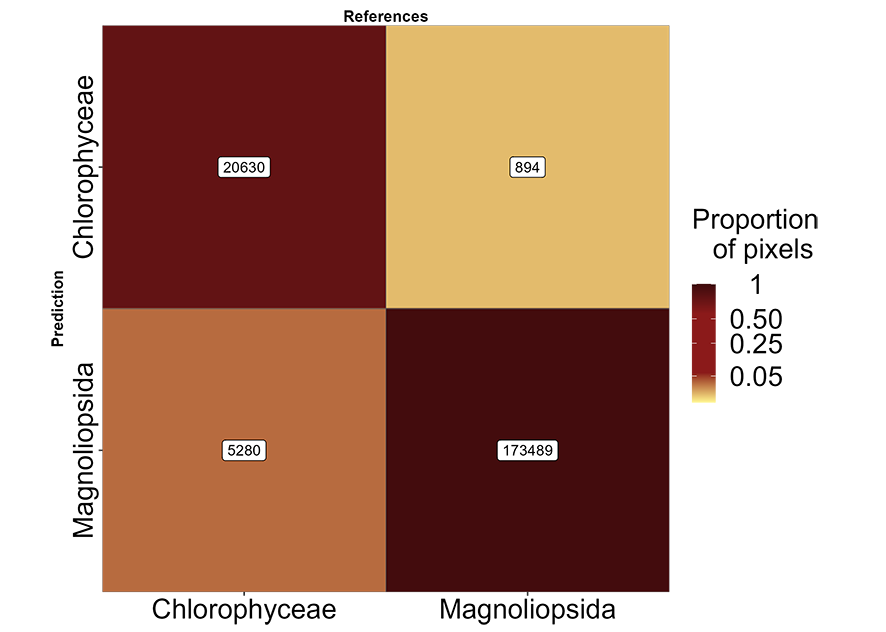
<figcaption>Figure 12: Sample of <a href="#fig-Validation" class="quarto-xref">Figure 8</a> focusing on green macrophytes. The labels inside the matrice indicate the number of pixels.</figcaption>
</figure>

The Micasense RedEdge-MX DUAL camera used in this study meets these two criteria, enabling the classifier to achieve 97% of accuracy between these two classes (<a href="#fig-ValidationGreen" class="quarto-xref">Figure 12</a>). Even if the pigment compostion of green macrophytes is similar, differences in the spectral shape can still be observed (<a href="#fig-vegetation" class="quarto-xref">Figure 2</a>). Several factors can explain these differences such has different pigment concentration or proportion, different cellular organisation and 3D disposition of the plant a whole on the intertidal mudflat Hedley et al. ([2018](#ref-hedley2018influence)).

The VIP analysis of the Neural Network model (<a href="#fig-VIP" class="quarto-xref">Figure 9</a>) shows that the 531 nm band is the most important spectral band for accurately identifying Chlorophyceae. In fact, at this wavelength, Chlorophyceae exhibits the highest reflectance among all other classes, highlighting the difference in accessories carotenoid proportion between seagrasses and green algae ([Repolho et al., 2017](#ref-repolho2017seagrass)).

Concerning Phaeophyceae, the thick cell walls of plant of this class make it really reflective in the infrared part of the spectra whereas the presence of Fucoxanthin and Zeaxanthin result in a low reflectance in the visible part of the electromagnetic spectra. These two key features has been identified by the Neural Network as the two principal predictors to accurately identify Brown algae (<a href="#fig-VIP" class="quarto-xref">Figure 9</a>). Similarly, the presence of phycoerythrin and phycocyanin in Rhodophyceae contributes to the lowest reflectance among all classes in the spectral range of 560 to 615 nm (<a href="#fig-VIP" class="quarto-xref">Figure 9</a>). The band at 560 nm has been identified as important for accurately identifying this class Resolution impact on the prediction. Regarding Bacillariophyceae, the VIP analysis (<a href="#fig-VIP" class="quarto-xref">Figure 9</a>) indicates that 475 nm is the most important predictor for this class. This could be attributed to the absence of lutein, neoxanthin, and zeaxanthin in diatoms, absorbing in the blue part of spectra, resulting in the highest visible reflectance among all classes. Furethemore, it is vegetation with the lowest concentration of chlorphyll-a, pigment absorbing light both in the blue and the red. The transparency of Bacillariophyceae makes the reflectance of the sediment part of the overall reflectance of Bacillariophyceae, further explaining the high reflectance in the blue.

## 4.2 Spectral Spatial Temporal Resolution impact on the prediction

In [ ]:
high_alt<- "Data/image/micasense/Gafanha_high_multi.tif" %>% 
  rast()

# low_alt<- "Data/image/micasense/Gafanha_Low_Multi_rsp.tif" %>% 
#   rast() 

low_alt<- "Data/image/micasense/Gafanha_low_multi.tif" %>% 
  rast() %>% 
  resample(high_alt, method = "med")


low_alt_pred<- "Data/image/prediction/NewPreds/Gafanha_Low_Pred_rsp.tif" %>% 
  rast() 

mask<-"Data/shp/Mask_Alt_Compare_All.shp" %>% 
  vect()
  
high_alt_masked<-crop(high_alt,mask)
high_alt_masked<-mask(high_alt_masked,mask)

low_alt_masked<-crop(low_alt,mask)
low_alt_masked<-mask(low_alt_masked,mask)

low_alt_pred_masked<-crop(low_alt_pred,mask)
low_alt_pred_masked<-mask(low_alt_pred_masked,mask)


stk<-rast(list(c(high_alt_masked,low_alt_masked,low_alt_pred_masked)))%>% 
  as.data.frame()

names(stk)<-c("B1_high","B2_high","B3_high","B4_high","B5_high","B6_high","B7_high","B8_high","B9_high","B10_high",
              "B1_low","B2_low","B3_low","B4_low","B5_low","B6_low","B7_low","B8_low","B9_low","B10_low",
              "pred")

stk_long<-stk %>% 
  mutate(px_ID = c(1:nrow(stk))) %>% 
  pivot_longer(-c(px_ID,pred),values_to = "Value",names_to = "Bands") %>% 
  mutate(alt = case_when(str_detect(Bands, "low") ~ "Low",
                         str_detect(Bands, "high") ~ "High",
                         TRUE ~ "NA"),
         Bands = gsub("_high","",Bands),
         Bands = gsub("_low","",Bands))


stk_summarized<-stk_long %>% 
  # group_by(px_ID,alt) %>% 
  # reframe(Value = mean(Value),
  #         pred = unique(pred)) %>% 
  pivot_wider(names_from = "alt", values_from = "Value")

df<-stk_summarized %>% 
  ungroup() %>% 
  group_by(Bands) %>% 
  filter(Low<10000,
         High < 10000,
         Low < quantile(Low,probs = 0.99),
         High < quantile(High,probs = 0.99),
         Low > quantile(Low,probs = 0.01),
         High > quantile(High,probs = 0.01),
         !pred %in% c(7,9,3,10)) %>%
  ungroup()
 
plot <- df %>% 
  group_by(pred) %>% 
  sample_n(10000) %>% 
  mutate(Low = Low /10000, 
         High = High/10000) %>% 
  ggplot(aes(x=Low, y=High))+
  # geom_point(aes(color = as.factor(pred)))
  ggpointdensity::geom_pointdensity(adjust = .03)+
  viridis::scale_color_viridis(limits = c(0,6000),
                               breaks = c(0,2000,4000,6000),
                               labels = c("1","2000","4000","6000"))+
  # geom_smooth(method = "loess")+
  geom_abline(intercept = 0, slope = 1, linewidth = 1, linetype = "dashed", color = "black" )+
  geom_smooth(method = "lm", color = "red", linetype = "dashed",linewidth = 1)+
  theme_Bede()+
  ylim(c(0.05,0.6))+
  xlim(c(0.05,0.6))+
  ylab("Reflectance of the 120m flight")+
  xlab("Reflectance of the 12m flight")+
  labs(color = "Pixel density")+
  theme(
    legend.position = "top",
        legend.key.width = unit(3,"line"))
plot
ggsave("./Figures/Compare_reflectance.png",plot, width= 472*4, height=402*4, units = "px")

``` r
# Pigment composition of the different vegetation classes. Green indicate the presence of the pigment in the class while red indicate the abscence. Chlb : Chlorophyll-b ; Chlc : Chlorophyll-c ; Fuco : Fucoxanthin ; Zea : Zeaxanthin ; Diad : Diadinoxanthin ; Lut : Lutein ; Neo : Neoxanthin ; PE : Phycoerythrin ; PC : Phycocyanin.

knitr::include_graphics("./Figures/Low_res/Compare_reflectance.png")
```

<figure id="fig-CompareRef">
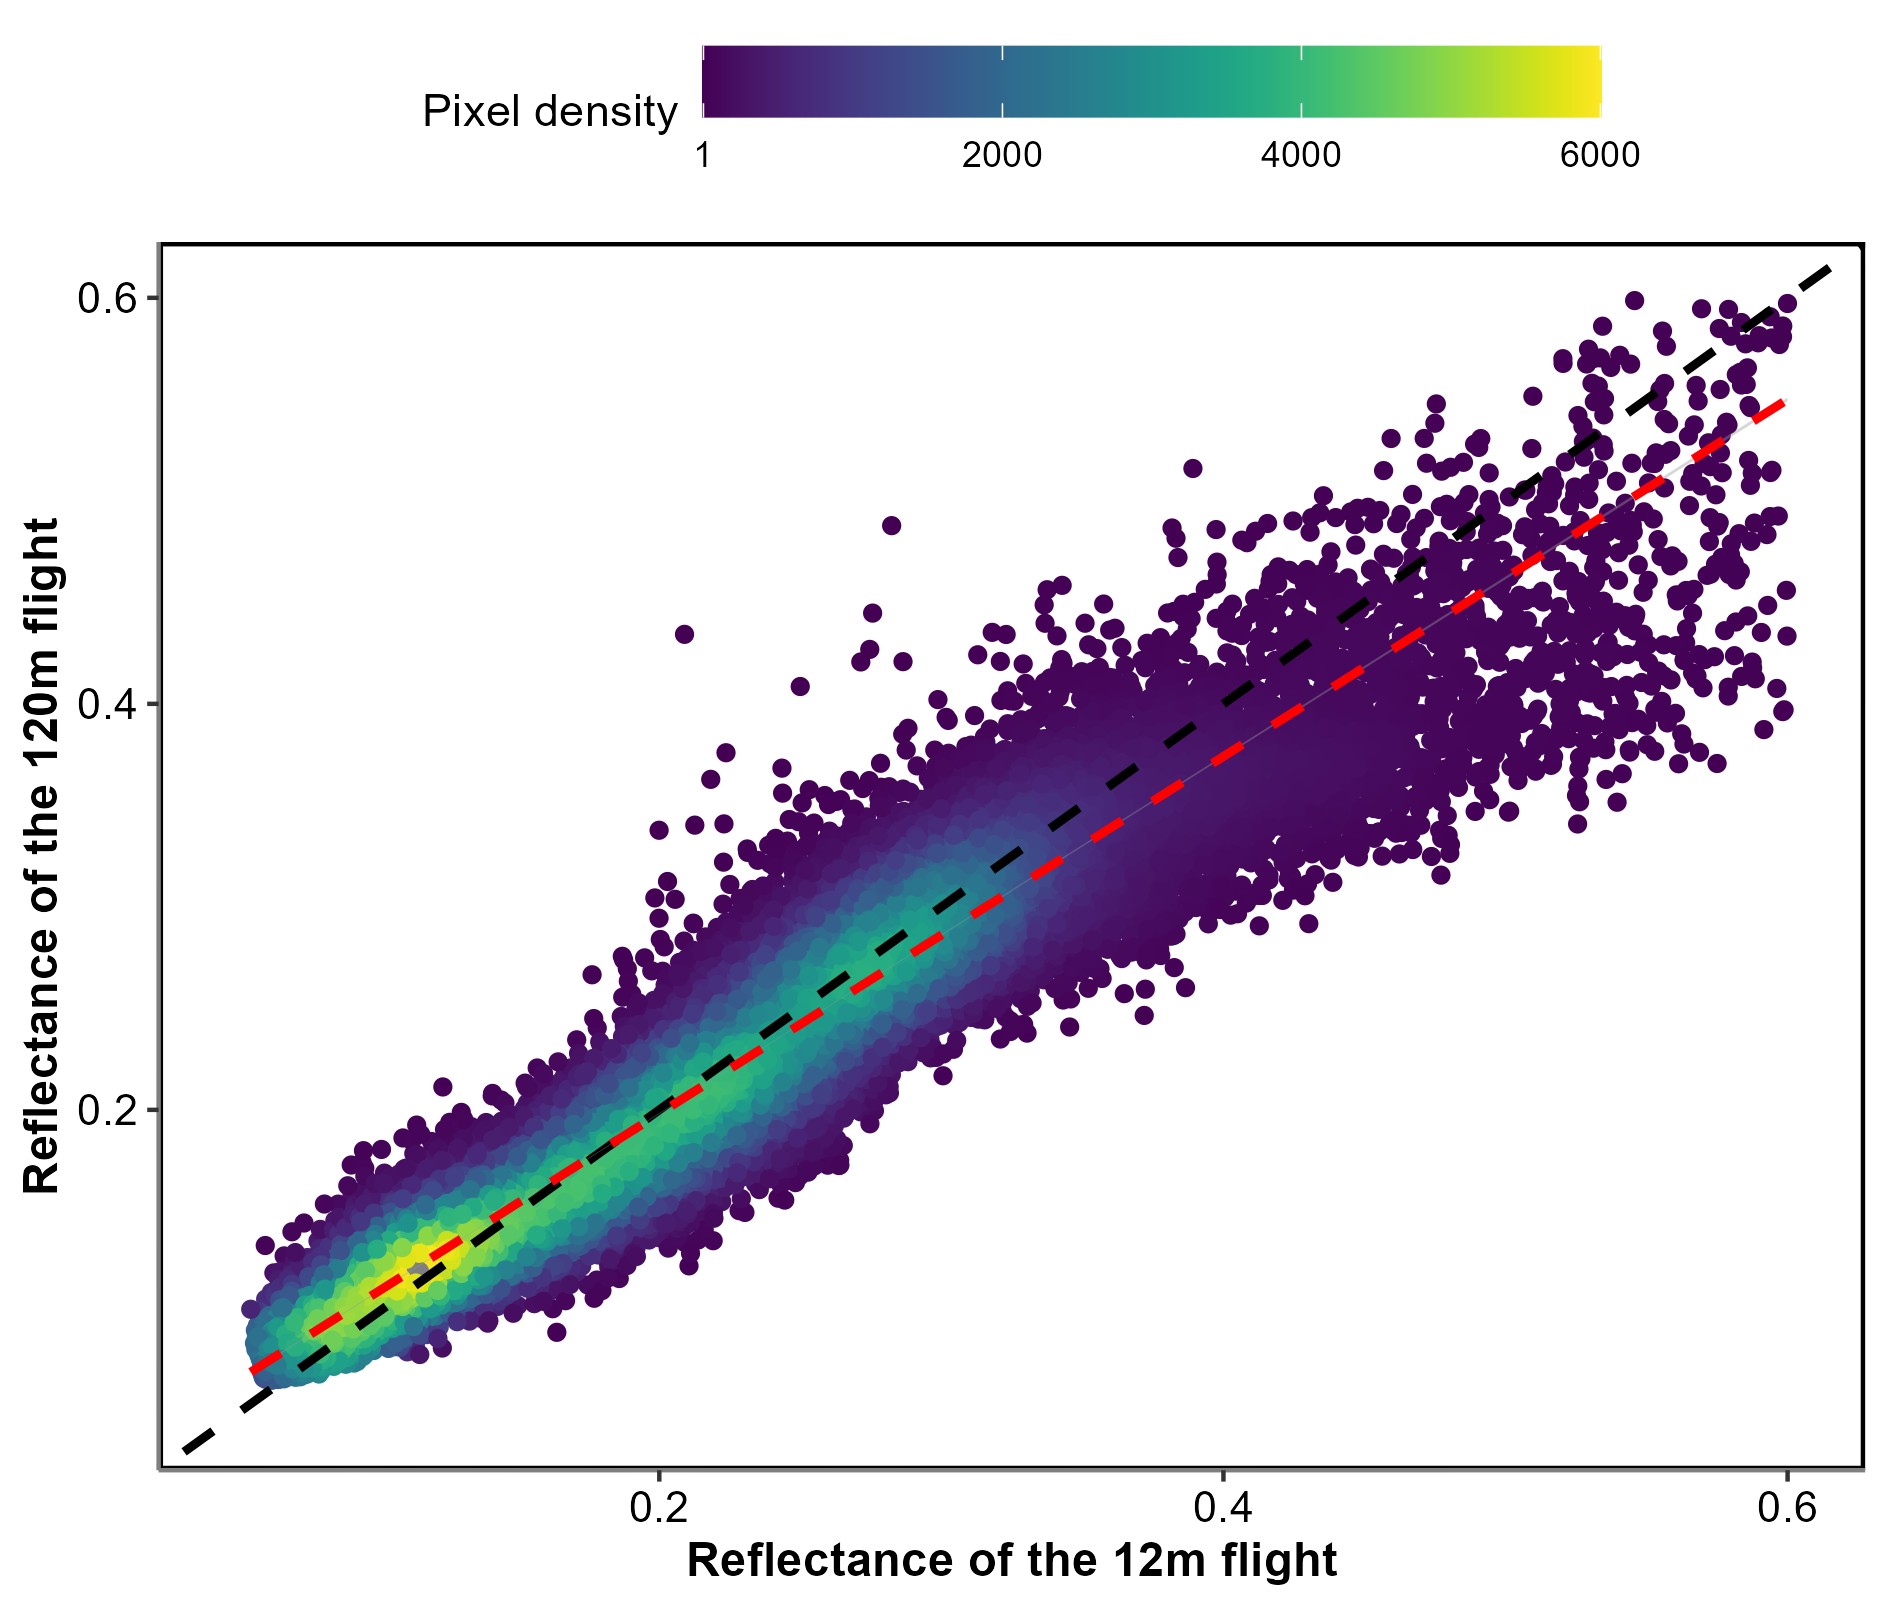
<figcaption>Figure 13: Comparison of reflectance retrieved from both low-altitude and high-altitude flights over a common area. The red dashed line represents a linear model wheras the black dashed line represents a 1 to 1 relationship.</figcaption>
</figure>

In this study, a key innovation lies in the utilization of two different altitudes (12m and 120m) for constructing the neural network model. The lower altitude flights (8mm spatial resolution) enable precise selection of pure pixels representing the classes used in the neural network model. This methodology implies a consistency between the reflectance of both altitude. <a href="#fig-CompareRef" class="quarto-xref">Figure 13</a> depicts the relationship between reflectance from a low-altitude flight and a high-altitude flight conducted over the same area. An apparent underestimation of reflectance values is observed in the high-altitude flight, particularly for higher values. Since both flights were conducted over vegetation areas, the highest reflectance values correspond to the infrared part of the spectrum.

The disparity in infrared reflectance may stem from temporal differences between the flights, possibly resulting in a slightly drier intertidal area and consequently higher infrared reflectance. This disparity poses an issue for the methodology followed in the present study, relying solely on one flight height for training. To address this issue, we employed min/max standardized reflectance spectra as predictors for the model (<a href="#eq-std" class="quarto-xref">Equation 1</a> ; ([Cao et al., 2017](#ref-Cao2017))). This approach allows us to eliminate differences in the level of reflectance, focusing instead on the shape of the spectra. This is a key feature in building a model that can reliably predict vegetation across geographical sites and seasons. It enables consistent prediction of vegetation classes across variations in biomass and variability in light conditions ([Fyfe, 2003](#ref-fyfe2003spatial) ; [Costa et al., 2021](#ref-COSTA2021107018) ; [Piaser et al., 2023](#ref-piaser2023impact)).

The <a href="#fig-upscaling" class="quarto-xref">Figure 10</a> demonstrates that a seagrass cover percentage of 90 % is necessary for confident prediction of seagrass presence. This highlights a limitation of the methodology used to construct the training dataset for the model. The dataset was composed exclusively of pure pixels, which has resulted in the model’s reduced confidence when faced with lower percentages of seagrass cover. This implies that outside of the biomass peak of seagrass this model should be less accurate. This needs to be futher investigated.

## 4.3 Big picture

# 5. Conclusion

Adade, R., Aibinu, A.M., Ekumah, B., Asaana, J., 2021. Unmanned aerial vehicle (UAV) applications in coastal zone management—a review. Environmental Monitoring and Assessment 193, 1–12.

Angnuureng, D.B., Brempong, K., Jayson-Quashigah, P., Dada, O., Akuoko, S., Frimpomaa, J., Mattah, P., Almar, R., 2022. Satellite, drone and video camera multi-platform monitoring of coastal erosion at an engineered pocket beach: A showcase for coastal management at elmina bay, ghana (west africa). Regional Studies in Marine Science 53, 102437.

Bannari, A., Ali, T.S., Abahussain, A., 2022. The capabilities of sentinel-MSI (2A/2B) and landsat-OLI (8/9) in seagrass and algae species differentiation using spectral reflectance. Ocean Science 18, 361–388.

Beach, K., Borgeas, H., Nishimura, N., Smith, C., 1997. In vivo absorbance spectra and the ecophysiology of reef macroalgae. Coral Reefs 16, 21–28.

Brunier, G., Oiry, S., Gruet, Y., Dubois, S.F., Barillé, L., 2022. Topographic analysis of intertidal polychaete reefs (sabellaria alveolata) at a very high spatial resolution. Remote Sensing 2022, Vol. 14, Page 307 14, 307. <https://doi.org/10.3390/RS14020307>

Cao, J., Thorson, J.T., Richards, R.A., Chen, Y., 2017. Spatiotemporal index standardization improves the stock assessment of northern shrimp in the gulf of maine. Canadian Journal of Fisheries and Aquatic Sciences 74, 1781–1793. <https://doi.org/10.1139/cjfas-2016-0137>

Casella, E., Drechsel, J., Winter, C., Benninghoff, M., Rovere, A., 2020. Accuracy of sand beach topography surveying by drones and photogrammetry. Geo-Marine Letters 40, 255–268.

Coffer, M.M., Graybill, D.D., Whitman, P.J., Schaeffer, B.A., Salls, W.B., Zimmerman, R.C., Hill, V., Lebrasse, M.C., Li, J., Keith, D.J., others, 2023. Providing a framework for seagrass mapping in united states coastal ecosystems using high spatial resolution satellite imagery. Journal of Environmental Management 337, 117669.

Collin, A., Dubois, S., James, D., Houet, T., 2019. Improving intertidal reef mapping using UAV surface, red edge, and near-infrared data. Drones 3, 67.

Costa, V., Serôdio, J., Lillebø, A.I., Sousa, A.I., 2021. Use of hyperspectral reflectance to non-destructively estimate seagrass zostera noltei biomass. Ecological Indicators 121, 107018. https://doi.org/<https://doi.org/10.1016/j.ecolind.2020.107018>

Davies, B.F.R., Gernez, P., Geraud, A., Oiry, Simon, Rosa, P., Zoffoli, M.L., Barillé, L., 2023a. Multi- and hyperspectral classification of soft-bottom intertidal vegetation using a spectral library for coastal biodiversity remote sensing. Remote Sensing of Environment 290, 113554. <https://doi.org/10.1016/j.rse.2023.113554>

Davies, B.F.R., Sousa, A.I., Figueira, R., Oiry, S., Gernez, P., Barillé, L., 2023b. Benthic intertidal vegetation from the tagus estuary and aveiro lagoon. <https://doi.org/10.15468/n4ak6x>

Devlin, M., Brodie, J., 2023. Nutrients and eutrophication, in: Marine Pollution–Monitoring, Management and Mitigation. Springer, pp. 75–100.

Douay, F., Verpoorter, C., Duong, G., Spilmont, N., Gevaert, F., 2022. New hyperspectral procedure to discriminate intertidal macroalgae. Remote Sensing 14. <https://doi.org/10.3390/rs14020346>

Duffy, J.E., Benedetti-Cecchi, L., Trinanes, J., Muller-Karger, F.E., Ambo-Rappe, R., Boström, C., Buschmann, A.H., Byrnes, J., Coles, R.G., Creed, J., others, 2019. Toward a coordinated global observing system for seagrasses and marine macroalgae. Frontiers in Marine Science 6, 317.

Fairley, I., Williamson, B.J., McIlvenny, J., King, N., Masters, I., Lewis, M., Neill, S., Glasby, D., Coles, D., Powell, B., others, 2022. Drone-based large-scale particle image velocimetry applied to tidal stream energy resource assessment. Renewable Energy 196, 839–855.

Fyfe, S., 2003. Spatial and temporal variation in spectral reflectance: Are seagrass species spectrally distinct? Limnology and Oceanography 48, 464–479.

Gardner, R.C., Finlayson, C., 2018. Global wetland outlook: State of the world’s wetlands and their services to people. Stetson Law.

Hedley, J.D., Mirhakak, M., Wentworth, A., Dierssen, H.M., 2018. Influence of three-dimensional coral structures on hyperspectral benthic reflectance and water-leaving reflectance. Applied Sciences 8, 2688.

Jankowska, E., Michel, L.N., Lepoint, G., Włodarska-Kowalczuk, M., 2019. Stabilizing effects of seagrass meadows on coastal water benthic food webs. Journal of Experimental Marine Biology and Ecology 510, 54–63.

Joyce, K.E., Fickas, K.C., Kalamandeen, M., 2023. The unique value proposition for using drones to map coastal ecosystems. Cambridge Prisms: Coastal Futures 1, e6.

Kirk, J.T., 1994. Light and photosynthesis in aquatic ecosystems. Cambridge university press.

Lin, H., Sun, T., Zhou, Y., Gu, R., Zhang, X., Yang, W., 2018. Which genes in a typical intertidal seagrass (zostera japonica) indicate copper-, lead-, and cadmium pollution? Frontiers in Plant Science 9, 1545.

Los Santos, C.B. de, Krause-Jensen, D., Alcoverro, T., Marbà, N., Duarte, C.M., Van Katwijk, M.M., Pérez, M., Romero, J., Sánchez-Lizaso, J.L., Roca, G., others, 2019. Recent trend reversal for declining european seagrass meadows. Nature communications 10, 3356.

Miloslavich, P., Bax, N.J., Simmons, S.E., Klein, E., Appeltans, W., Aburto-Oropeza, O., Garcia, M.A., Batten, S.D., Benedetti-Cecchi, L., Checkley, D.M., Chiba, S., Duffy, J.E., Dunn, D.C., Fischer, A., Gunn, J., Kudela, R., Marsac, F., Muller-Karger, F.E., Obura, D., Shin, Y.J., 2018. Essential ocean variables for global sustained observations of biodiversity and ecosystem changes. Global Change Biology 24, 2416–2433. <https://doi.org/10.1111/GCB.14108>

Nguyen, H.M., Ralph, P.J., Marı́n-Guirao, L., Pernice, M., Procaccini, G., 2021. Seagrasses in an era of ocean warming: A review. Biological Reviews 96, 2009–2030.

Nijland, W., Reshitnyk, L., Rubidge, E., 2019. Satellite remote sensing of canopy-forming kelp on a complex coastline: A novel procedure using the landsat image archive. Remote Sensing of Environment 220, 41–50.

Oh, J., Kim, D., Lee, H., 2017. Use of a drone for mapping and time series image acquisition of tidal zones. Journal of the Korean Institute of Intelligent Systems 27, 119–125.

Orth, R.J., Carruthers, T.J., Dennison, W.C., Duarte, C.M., Fourqurean, J.W., Heck, K.L., Hughes, A.R., Kendrick, G.A., Kenworthy, W.J., Olyarnik, S., others, 2006. A global crisis for seagrass ecosystems. Bioscience 56, 987–996.

Pereira, H.M., Ferrier, S., Walters, M., Geller, G.N., Jongman, R.H., Scholes, R.J., Bruford, M.W., Brummitt, N., Butchart, S.H., Cardoso, A., others, 2013. Essential biodiversity variables. Science 339, 277–278.

Piaser, E., Berton, A., Bolpagni, R., Caccia, M., Castellani, M.B., Coppi, A., Dalla Vecchia, A., Gallivanone, F., Sona, G., Villa, P., 2023. Impact of radiometric variability on ultra-high resolution hyperspectral imagery over aquatic vegetation: Preliminary results. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing.

Ralph, P., Polk, S., Moore, K., Orth, R., Smith Jr, W., 2002. Operation of the xanthophyll cycle in the seagrass zostera marina in response to variable irradiance. Journal of Experimental Marine Biology and Ecology 271, 189–207.

Repolho, T., Duarte, B., Dionı́sio, G., Paula, J.R., Lopes, A.R., Rosa, I.C., Grilo, T.F., Caçador, I., Calado, R., Rosa, R., 2017. Seagrass ecophysiological performance under ocean warming and acidification. Scientific Reports 7, 41443.

Roca, M., Dunbar, M.B., Román, A., Caballero, I., Zoffoli, M.L., Gernez, P., Navarro, G., 2022. Monitoring the marine invasive alien species rugulopteryx okamurae using unmanned aerial vehicles and satellites. Frontiers in Marine Science 9. <https://doi.org/10.3389/fmars.2022.1004012>

Román, A., Tovar-Sánchez, A., Olivé, I., Navarro, G., 2021. Using a UAV-mounted multispectral camera for the monitoring of marine macrophytes. Frontiers in Marine Science 1225.

Rossiter, T., Furey, T., McCarthy, T., Stengel, D.B., 2020. UAV-mounted hyperspectral mapping of intertidal macroalgae. Estuarine, Coastal and Shelf Science 242, 106789.

Soissons, L.M., Haanstra, E.P., Van Katwijk, M.M., Asmus, R., Auby, I., Barillé, L., Brun, F.G., Cardoso, P.G., Desroy, N., Fournier, J., others, 2018. Latitudinal patterns in european seagrass carbon reserves: Influence of seasonal fluctuations versus short-term stress and disturbance events. Frontiers in Plant Science 9, 88.

Tallam, K., Nguyen, N., Ventura, J., Fricker, A., Calhoun, S., O’Leary, J., Fitzgibbons, M., Robbins, I., Walter, R.K., 2023. Application of deep learning for classification of intertidal eelgrass from drone-acquired imagery. Remote Sensing 15, 2321.

Traganos, D., Reinartz, P., 2018. Mapping mediterranean seagrasses with sentinel-2 imagery. Marine Pollution Bulletin 134, 197–209. <https://doi.org/10.1016/j.marpolbul.2017.06.075>

Tuya, F., Hernandez-Zerpa, H., Espino, F., Haroun, R., 2013. Drastic decadal decline of the seagrass cymodocea nodosa at gran canaria (eastern atlantic): Interactions with the green algae caulerpa prolifera. Aquatic Botany 105, 1–6.

Unsworth, R.K., Cullen-Unsworth, L.C., Jones, B.L., Lilley, R.J., 2022. The planetary role of seagrass conservation. Science 377, 609–613.

Wang, Z., Fang, Z., Liang, J., Song, X., 2022. Assessment of global habitat suitability and risk of ocean green tides. Harmful Algae 119, 102324.

Xu, S., Xu, S., Zhou, Y., Yue, S., Zhang, X., Gu, R., Zhang, Y., Qiao, Y., Liu, M., 2021. Long-term changes in the unique and largest seagrass meadows in the bohai sea (china) using satellite (1974–2019) and sonar data: Implication for conservation and restoration. Remote Sensing 13, 856.

Zoffoli, M.L., Gernez, P., Godet, L., Peters, S., Oiry, S., Barillé, L., 2021. Decadal increase in the ecological status of a north-atlantic intertidal seagrass meadow observed with multi-mission satellite time-series. Ecological Indicators 130, 108033. <https://doi.org/10.1016/j.ecolind.2021.108033>

Zoffoli, M.L., Gernez, P., Oiry, S., Godet, L., Dalloyau, S., Davies, B.F.R., Barillé, L., 2022. Remote sensing in seagrass ecology: Coupled dynamics between migratory herbivorous birds and intertidal meadows observed by satellite during four decades. Remote Sensing in Ecology and Conservation. <https://doi.org/10.1002/rse2.319>